In [52]:
# Predicting the Key Influencers for the 2024 MLB Season
# Jordan S Richman
# 2024 Project start 11/15/2023

import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import r2_score
import seaborn as sns
import sys
from IPython.display import display, Image
import unicodedata

In [53]:
# Read the Excel sheet into a DataFrame
mlb_salaries_2024 = pd.read_excel('players_salary_2024.xlsx', header=None)
# Reshape the DataFrame so every 4 rows correspond to one player
mlb_salaries_2024 = mlb_salaries_2024.values.reshape(-1, 4)
# Convert the reshaped array into a DataFrame with appropriate column names
mlb_salaries_2024 = pd.DataFrame(mlb_salaries_2024, columns=['rank', 'player_name', 'players_team_and_position', 'players_yearly_salary'])
# Split 'players_team_and_position' into 'players_team' and 'primary_position'
mlb_salaries_2024[['players_team', 'primary_position']] = mlb_salaries_2024['players_team_and_position'].str.split(',', expand=True)
# Clean up any extra spaces and columns
mlb_salaries_2024['players_team'] = mlb_salaries_2024['players_team'].str.strip()
mlb_salaries_2024['primary_position'] = mlb_salaries_2024['primary_position'].str.strip()
mlb_salaries_2024 = mlb_salaries_2024.drop(columns=['players_team_and_position'])
mlb_salaries_2024 = mlb_salaries_2024.drop(columns='rank')

mlb_salaries_2023 = pd.read_excel('players_salary_2023.xlsx', header=None)
mlb_salaries_2023 = mlb_salaries_2023[0].values.reshape(-1, 3)
mlb_salaries_2023 = pd.DataFrame(mlb_salaries_2023, columns=['player_name', 'players_team/primary_position', 'players_yearly_salary'])
mlb_salaries_2023[['players_team', 'primary_position']] = mlb_salaries_2023['players_team/primary_position'].str.split(',', expand=True)
mlb_salaries_2023.drop(columns='players_team/primary_position', inplace=True)

mlb_salaries_2022 = pd.read_excel('players_salary_2022.xlsx', header=None)
mlb_salaries_2022 = mlb_salaries_2022[0].values.reshape(-1, 3)
mlb_salaries_2022 = pd.DataFrame(mlb_salaries_2022, columns=['player_name', 'players_team/primary_position', 'players_yearly_salary'])
mlb_salaries_2022[['players_team', 'primary_position']] = mlb_salaries_2022['players_team/primary_position'].str.split(',', expand=True)
mlb_salaries_2022.drop(columns='players_team/primary_position', inplace=True)

mlb_salaries_2021 = pd.read_excel('players_salary_2021.xlsx', header=None)
mlb_salaries_2021 = mlb_salaries_2021[0].values.reshape(-1, 3)
mlb_salaries_2021 = pd.DataFrame(mlb_salaries_2021, columns=['player_name', 'players_team/primary_position', 'players_yearly_salary'])
mlb_salaries_2021[['players_team', 'primary_position']] = mlb_salaries_2021['players_team/primary_position'].str.split(',', expand=True)
mlb_salaries_2021.drop(columns='players_team/primary_position', inplace=True)

# copy, paste, filter on numbers less than 600, clear, filter on blanks, copy, paste new sheet
mlb_salaries_2025 = pd.read_excel('players_salary_2025.xlsx', header=None)
mlb_salaries_2025 = mlb_salaries_2025[0].values.reshape(-1, 3)
mlb_salaries_2025 = pd.DataFrame(mlb_salaries_2025, columns=['player_name', 'players_team/primary_position', 'players_yearly_salary'])
mlb_salaries_2025[['players_team', 'primary_position']] = mlb_salaries_2025['players_team/primary_position'].str.split(',', expand=True)
mlb_salaries_2025.drop(columns='players_team/primary_position', inplace=True)

mlb_salaries_2025

,player_name,players_yearly_salary,players_team,primary_position
0,Shohei Ohtani,70000000,LAD,SP/DH
1,Juan Soto,51875000,NYM,RF
2,Aaron Judge,40000000,NYY,RF
3,Anthony Rendon,38571428,LAA,3B
4,Carlos Correa,37333333,MIN,SS
...,...,...,...,...
514,Zach Neto,800000,LAA,SS
515,Zack Gelof,800000,ATH,2B
516,Óscar Colás,800000,CHW,RF/OF
517,Scott Kingery,770000,LAA,2B


In [54]:
data2024 = pd.read_csv('Documents/expected_stats_2024_new.csv')
data2024 = data2024.rename(columns={'last_name, first_name': 'player_name'})
data2024['player_name'] = data2024['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

data2023 = pd.read_csv(r'C:\Users\jsric\OneDrive\Documents\expected_stats_2023_new.csv', encoding='utf-8')
data2023['player_name'] = data2023['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

data2022 = pd.read_csv(r'C:\Users\jsric\OneDrive\Documents\expected_stats_2022_new.csv', encoding='utf-8')
data2022['player_name'] = data2022['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

data2021 = pd.read_csv(r'C:\Users\jsric\OneDrive\Documents\expected_stats_2021_new.csv', encoding='utf-8')
data2021['player_name'] = data2021['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))


exitdata2024 = pd.read_csv('exit_velocity_2024_new.csv')
exitdata2024 = exitdata2024.rename(columns={'last_name, first_name': 'player_name'})
exitdata2024['year'] = 2024
exitdata2024['player_name'] = exitdata2024['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

exitdata2023 = pd.read_csv(r'C:\Users\jsric\OneDrive\Documents\exit_velocity_2023_new.csv', encoding='utf-8')
exitdata2023['player_name'] = exitdata2023['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

exitdata2022 = pd.read_csv(r'C:\Users\jsric\OneDrive\Documents\exit_velocity_2022_new.csv', encoding='utf-8')
exitdata2022['player_name'] = exitdata2022['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

exitdata2021 = pd.read_csv(r'C:\Users\jsric\OneDrive\Documents\exit_velocity_2021_new.csv', encoding='utf-8')
exitdata2021['player_name'] = exitdata2021['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))

# Function to remove accents
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Merge the datasets based on 'player_id' for each year
merged_data2024 = pd.merge(data2024, exitdata2024, on='player_id')
merged_data2024.drop(['player_name_y'], axis=1, inplace=True)
merged_data2024.rename(columns={'player_name_x': 'player_name'}, inplace=True)
merged_data2024['player_name'] = merged_data2024['player_name'].apply(remove_accents)
mlb_salaries_2024['player_name'] = mlb_salaries_2024['player_name'].apply(remove_accents)
merged_data2024 = pd.merge(merged_data2024, mlb_salaries_2024, on='player_name', how='left')

merged_data2023 = pd.merge(data2023, exitdata2023, on='player_id')
merged_data2023.drop(['player_name_y'], axis=1, inplace=True)
merged_data2023.rename(columns={'player_name_x': 'player_name'}, inplace=True)
merged_data2023['player_name'] = merged_data2023['player_name'].apply(remove_accents)
mlb_salaries_2023['player_name'] = mlb_salaries_2023['player_name'].apply(remove_accents)
merged_data2023 = pd.merge(merged_data2023, mlb_salaries_2023, on='player_name', how='left')

merged_data2022 = pd.merge(data2022, exitdata2022, on='player_id')
merged_data2022.drop(['player_name_y'], axis=1, inplace=True)
merged_data2022.rename(columns={'player_name_x': 'player_name'}, inplace=True)
merged_data2022['player_name'] = merged_data2022['player_name'].apply(remove_accents)
mlb_salaries_2022['player_name'] = mlb_salaries_2022['player_name'].apply(remove_accents)
merged_data2022 = pd.merge(merged_data2022, mlb_salaries_2022, on='player_name', how='left')

merged_data2021 = pd.merge(data2021, exitdata2021, on='player_id')
merged_data2021.drop(['player_name_y'], axis=1, inplace=True)
merged_data2021.rename(columns={'player_name_x': 'player_name'}, inplace=True)
merged_data2021['player_name'] = merged_data2021['player_name'].apply(remove_accents)
mlb_salaries_2021['player_name'] = mlb_salaries_2021['player_name'].apply(remove_accents)
merged_data2021 = pd.merge(merged_data2021, mlb_salaries_2021, on='player_name', how='left')

# Combine the merged datasets into a single dataframe
all_data = pd.concat([merged_data2024, merged_data2023, merged_data2022, merged_data2021])

# Resetting the index to avoid any issues
all_data.reset_index(drop=True, inplace=True)

# Drop the original columns of unneeded columns/ dup columns
all_data.drop(['year_y'], axis=1, inplace=True)
# all_data.drop(['player_name_y'], axis=1, inplace=True)
# all_data.rename(columns={'player_name_x': 'player_name'}, inplace=True)
all_data.rename(columns={'year_x': 'year'}, inplace=True)
all_data['est_ops'] = all_data['est_woba'] + all_data['est_slg']
all_data['ops'] = all_data['woba'] + all_data['slg']
all_data['est_iso'] = all_data['est_slg'] - all_data['est_ba']
all_data['iso'] = all_data['slg'] - all_data['ba']
# all_data['player_name'] = all_data['player_name'].apply(lambda x: ' '.join(x.split(', ')[::-1]))
all_data = all_data[['player_name', 'year', 'pa', 'est_ba', 'est_slg', 'est_woba', 'est_ops', 'est_iso', 'brl_percent', 'players_yearly_salary', 'players_team',
       'primary_position']]
all_data['brl_percent'] = all_data['brl_percent']/100
all_data

,player_name,year,pa,est_ba,est_slg,est_woba,est_ops,est_iso,brl_percent,players_yearly_salary,players_team,primary_position
0,Jarren Duran,2024,735,0.275,0.453,0.342,0.795,0.178,0.093,760000,BOS,CF
1,Shohei Ohtani,2024,731,0.314,0.660,0.442,1.102,0.346,0.215,70000000,LAD,DH
2,Gunnar Henderson,2024,719,0.283,0.492,0.374,0.866,0.209,0.112,756200,BAL,SS
3,Marcus Semien,2024,718,0.251,0.391,0.313,0.704,0.140,0.066,26000000,TEX,2B
4,Juan Soto,2024,713,0.316,0.646,0.462,1.108,0.330,0.197,31000000,NYY,RF
...,...,...,...,...,...,...,...,...,...,...,...,...
1621,Jarrod Dyson,2021,149,0.220,0.285,0.251,0.536,0.065,0.009,1500000,TOR,CF
1622,John Nogowski,2021,143,0.241,0.312,0.279,0.591,0.071,0.000,NaN,NaN,NaN
1623,Austin Wynns,2021,139,0.201,0.296,0.242,0.538,0.095,0.030,570500,BAL,C
1624,Max Schrock,2021,134,0.265,0.370,0.293,0.663,0.105,0.029,570500,CIN,SS


In [55]:
# xWAR Calculation

# Assign weights
a, b, c, d = 1.0, 1.0, 1.0, 1.0

# Calculate xWAR
all_data['xWAR'] = (
    all_data['pa'] * (
        a * all_data['est_woba'] +
        b * all_data['est_slg'] +
        c * all_data['est_ba'] +
        d * all_data['brl_percent']
    )
)

teams_to_league = {
    # American League (AL)
    'BAL': 'AL',  # Baltimore Orioles
    'BOS': 'AL',  # Boston Red Sox
    'NYY': 'AL',  # New York Yankees
    'TB': 'AL',   # Tampa Bay Rays
    'TOR': 'AL',  # Toronto Blue Jays
    'CWS': 'AL',  # Chicago White Sox
    'CLE': 'AL',  # Cleveland Guardians
    'DET': 'AL',  # Detroit Tigers
    'KC': 'AL',   # Kansas City Royals
    'MIN': 'AL',  # Minnesota Twins
    'HOU': 'AL',  # Houston Astros
    'LAA': 'AL',  # Los Angeles Angels
    'OAK': 'AL',  # Oakland Athletics
    'SEA': 'AL',  # Seattle Mariners
    'TEX': 'AL',  # Texas Rangers

    # National League (NL)
    'ATL': 'NL',  # Atlanta Braves
    'MIA': 'NL',  # Miami Marlins
    'NYM': 'NL',  # New York Mets
    'PHI': 'NL',  # Philadelphia Phillies
    'WSH': 'NL',  # Washington Nationals
    'CHC': 'NL',  # Chicago Cubs
    'CIN': 'NL',  # Cincinnati Reds
    'MIL': 'NL',  # Milwaukee Brewers
    'PIT': 'NL',  # Pittsburgh Pirates
    'STL': 'NL',  # St. Louis Cardinals
    'ARI': 'NL',  # Arizona Diamondbacks
    'COL': 'NL',  # Colorado Rockies
    'LAD': 'NL',  # Los Angeles Dodgers
    'SD': 'NL',   # San Diego Padres
    'SF': 'NL'    # San Francisco Giants
}
# Standardize column values
all_data['players_team'] = all_data['players_team'].str.strip().str.upper()
all_data['League'] = all_data['players_team'].map(teams_to_league)
all_data

,player_name,year,pa,est_ba,est_slg,est_woba,est_ops,est_iso,brl_percent,players_yearly_salary,players_team,primary_position,xWAR,League
0,Jarren Duran,2024,735,0.275,0.453,0.342,0.795,0.178,0.093,760000,BOS,CF,854.805,AL
1,Shohei Ohtani,2024,731,0.314,0.660,0.442,1.102,0.346,0.215,70000000,LAD,DH,1192.261,NL
2,Gunnar Henderson,2024,719,0.283,0.492,0.374,0.866,0.209,0.112,756200,BAL,SS,906.659,AL
3,Marcus Semien,2024,718,0.251,0.391,0.313,0.704,0.140,0.066,26000000,TEX,2B,733.078,AL
4,Juan Soto,2024,713,0.316,0.646,0.462,1.108,0.330,0.197,31000000,NYY,RF,1155.773,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,Jarrod Dyson,2021,149,0.220,0.285,0.251,0.536,0.065,0.009,1500000,TOR,CF,113.985,AL
1622,John Nogowski,2021,143,0.241,0.312,0.279,0.591,0.071,0.000,NaN,NaN,NaN,118.976,NaN
1623,Austin Wynns,2021,139,0.201,0.296,0.242,0.538,0.095,0.030,570500,BAL,C,106.891,AL
1624,Max Schrock,2021,134,0.265,0.370,0.293,0.663,0.105,0.029,570500,CIN,SS,128.238,NL


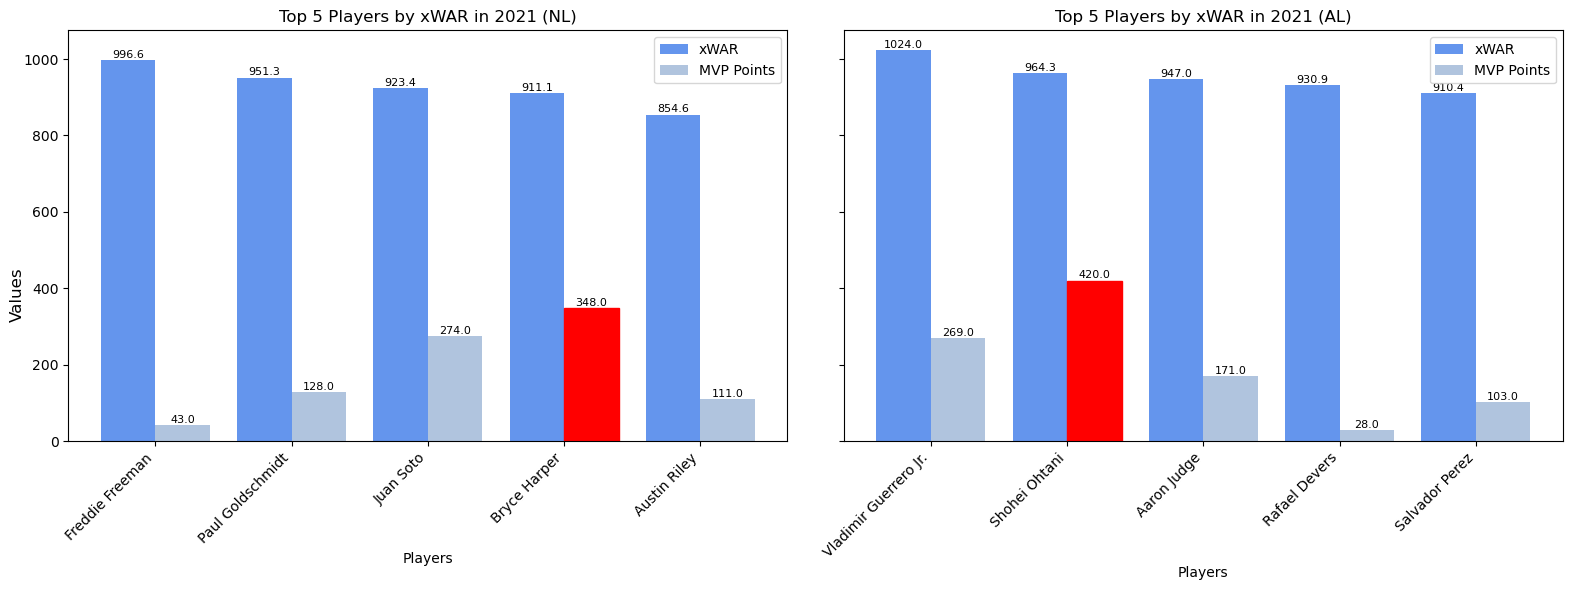

In [56]:
mvp_votes_2021 = [
    {"player_name": "Bryce Harper", "points": 348},
    {"player_name": "Juan Soto", "points": 274},
    {"player_name": "Fernando Tatis Jr.", "points": 244},
    {"player_name": "Brandon Crawford", "points": 213},
    {"player_name": "Trea Turner", "points": 185},
    {"player_name": "Paul Goldschmidt", "points": 128},
    {"player_name": "Austin Riley", "points": 111},
    {"player_name": "Tyler O'Neill", "points": 62},
    {"player_name": "Freddie Freeman", "points": 43},
    {"player_name": "Max Muncy", "points": 38},
    {"player_name": "Shohei Ohtani", "points": 420},
    {"player_name": "Vladimir Guerrero Jr.", "points": 269},
    {"player_name": "Marcus Semien", "points": 232},
    {"player_name": "Aaron Judge", "points": 171},
    {"player_name": "Carlos Correa", "points": 163},
    {"player_name": "José Ramírez", "points": 133},
    {"player_name": "Salvador Perez", "points": 103},
    {"player_name": "Matt Olson", "points": 90},
    {"player_name": "Cedric Mullins", "points": 87},
    {"player_name": "Brandon Lowe", "points": 34},
    {"player_name": "Bryan Reynolds", "points": 33},
    {"player_name": "Nick Castellanos", "points": 24},
    {"player_name": "Ozzie Albies", "points": 12},
    {"player_name": "Max Scherzer", "points": 11},
    {"player_name": "Corbin Burnes", "points": 9},
    {"player_name": "Joey Votto", "points": 8},
    {"player_name": "Willy Adames", "points": 8},
    {"player_name": "Manny Machado", "points": 7},
    {"player_name": "Zack Wheeler", "points": 6},
    {"player_name": "Adam Wainwright", "points": 3},
    {"player_name": "LaMonte Wade Jr.", "points": 1},
    {"player_name": "Kevin Gausman", "points": 1},
    {"player_name": "Buster Posey", "points": 1},
    {"player_name": "Rafael Devers", "points": 28},
    {"player_name": "Bo Bichette", "points": 7},
    {"player_name": "Xander Bogaerts", "points": 7},
    {"player_name": "José Abreu", "points": 5},
    {"player_name": "Nathan Eovaldi", "points": 4},
    {"player_name": "Robbie Ray", "points": 4},
    {"player_name": "Gerrit Cole", "points": 4},
    {"player_name": "Jose Altuve", "points": 3},
    {"player_name": "Teoscar Hernández", "points": 2},
    {"player_name": "Kyle Tucker", "points": 1},
    {"player_name": "Mike Zunino", "points": 1},
    {"player_name": "Austin Meadows", "points": 1},
    {"player_name": "Mitch Haniger", "points": 1}
]

# Create DataFrame
mvp_votes_2021 = pd.DataFrame(mvp_votes_2021)
data_2021 = all_data[all_data['year'] == 2021]

# Filter data by league
leagues = ['NL', 'AL']
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, league in enumerate(leagues):
    # Filter for the league
    league_data = data_2021[data_2021['League'] == league]
    
    # Select the top 5 players by xWAR for this league
    top_5_xWAR = league_data.nlargest(5, 'xWAR')
    
    # Merge with MVP votes
    merged_data = top_5_xWAR.merge(mvp_votes_2021, on='player_name', how='left')
    
    # Fill NaN MVP points with 0
    merged_data['points'] = merged_data['points'].fillna(0)
    
    # Get the top 2 MVP players in this league
    mvp_player = merged_data.nlargest(1, 'points')['player_name'].values
    
    # Bar positions
    x = np.arange(len(merged_data))
    width = 0.4
    
    # Bar chart for xWAR and MVP Points
    ax = axes[i]
    xwar_bars = ax.bar(x - width/2, merged_data['xWAR'], width, label='xWAR', color='cornflowerblue')
    points_bars = []
    
    for j, bar in enumerate(ax.bar(x + width/2, merged_data['points'], width, label='MVP Points', color='lightsteelblue')):
        if merged_data['player_name'].iloc[j] in mvp_player:
            bar.set_color('red')  # Highlight top 2 players
        points_bars.append(bar)
    
    # Add labels and title
    ax.set_xlabel('Players')
    ax.set_title(f'Top 5 Players by xWAR in 2021 ({league})')
    ax.set_xticks(x)
    ax.set_xticklabels(merged_data['player_name'], rotation=45, ha='right')
    ax.legend()
    
    # Annotate bars
    for bar in xwar_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)
    for bar in points_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)

# Shared y-axis label
fig.supylabel('Values')
plt.tight_layout()
plt.show()

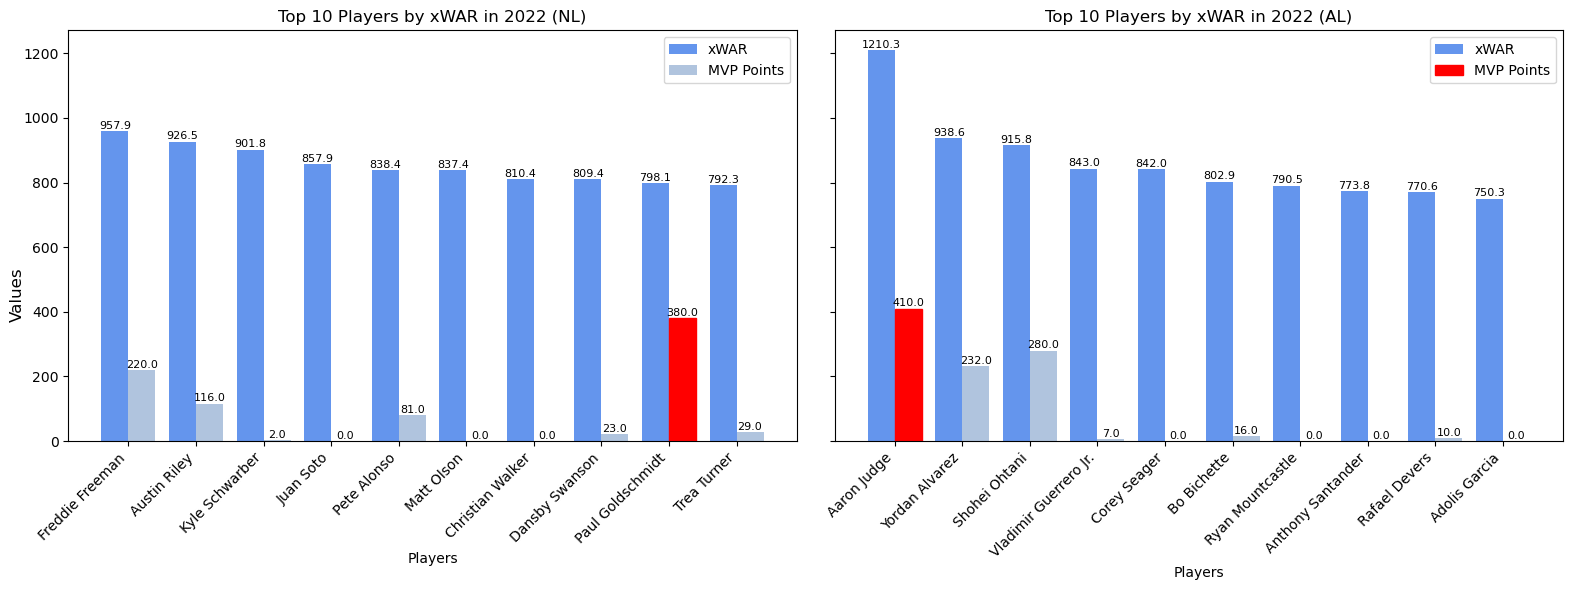

In [57]:
# Removed Pitchers from MVP conversation for now
mvp_votes_2022 = [
    {"player_name": "Paul Goldschmidt", "points": 380},
    {"player_name": "Manny Machado", "points": 291},
    {"player_name": "Nolan Arenado", "points": 232},
    {"player_name": "Freddie Freeman", "points": 220},
    {"player_name": "Mookie Betts", "points": 154},
    {"player_name": "Austin Riley", "points": 116},
    {"player_name": "J.T. Realmuto", "points": 98},
    {"player_name": "Pete Alonso", "points": 81},
    {"player_name": "Francisco Lindor", "points": 77},
    {"player_name": "Trea Turner", "points": 29},
    {"player_name": "Aaron Judge", "points": 410},
    {"player_name": "Shohei Ohtani", "points": 280},
    {"player_name": "Yordan Alvarez", "points": 232},
    {"player_name": "José Ramírez", "points": 186},
    {"player_name": "Jose Altuve", "points": 142},
    {"player_name": "Andrés Giménez", "points": 141},
    {"player_name": "Julio Rodríguez", "points": 108},
    {"player_name": "Mike Trout", "points": 90},
    {"player_name": "Xander Bogaerts", "points": 50},
    {"player_name": "Bo Bichette", "points": 16},
    {"player_name": "Dansby Swanson", "points": 23},
    {"player_name": "Michael Harris II", "points": 9},
    {"player_name": "Jeff McNeil", "points": 6},
    {"player_name": "Kyle Schwarber", "points": 2},
    {"player_name": "Starling Marte", "points": 1},
    {"player_name": "Adley Rutschman", "points": 14},
    {"player_name": "Luis Arraez", "points": 12},
    {"player_name": "Rafael Devers", "points": 10},
    {"player_name": "Kyle Tucker", "points": 8},
    {"player_name": "Vladimir Guerrero Jr.", "points": 7},
    {"player_name": "José Abreu", "points": 5},
    {"player_name": "Alex Bregman", "points": 4},
    {"player_name": "Yandy Díaz", "points": 2},
    {"player_name": "Sean Murphy", "points": 1}
]

# Create DataFrame
mvp_votes_2022 = pd.DataFrame(mvp_votes_2022)
data_2022 = all_data[all_data['year'] == 2022]

# Filter data by league
leagues = ['NL', 'AL']
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, league in enumerate(leagues):
    # Filter for the league
    league_data = data_2022[data_2022['League'] == league]
    
    # Select the top 5 players by xWAR for this league
    top_5_xWAR = league_data.nlargest(10, 'xWAR')
    
    # Merge with MVP votes
    merged_data = top_5_xWAR.merge(mvp_votes_2022, on='player_name', how='left')
    
    # Fill NaN MVP points with 0
    merged_data['points'] = merged_data['points'].fillna(0)
    
    # Get the top 2 MVP players in this league
    mvp_player = merged_data.nlargest(1, 'points')['player_name'].values
    
    # Bar positions
    x = np.arange(len(merged_data))
    width = 0.4
    
    # Bar chart for xWAR and MVP Points
    ax = axes[i]
    xwar_bars = ax.bar(x - width/2, merged_data['xWAR'], width, label='xWAR', color='cornflowerblue')
    points_bars = []
    
    for j, bar in enumerate(ax.bar(x + width/2, merged_data['points'], width, label='MVP Points', color='lightsteelblue')):
        if merged_data['player_name'].iloc[j] in mvp_player:
            bar.set_color('red')  # Highlight top 2 players
        points_bars.append(bar)
    
    # Add labels and title
    ax.set_xlabel('Players')
    ax.set_title(f'Top 10 Players by xWAR in 2022 ({league})')
    ax.set_xticks(x)
    ax.set_xticklabels(merged_data['player_name'], rotation=45, ha='right')
    ax.legend()
    
    # Annotate bars
    for bar in xwar_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)
    for bar in points_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)

# Shared y-axis label
fig.supylabel('Values')
plt.tight_layout()
plt.show()

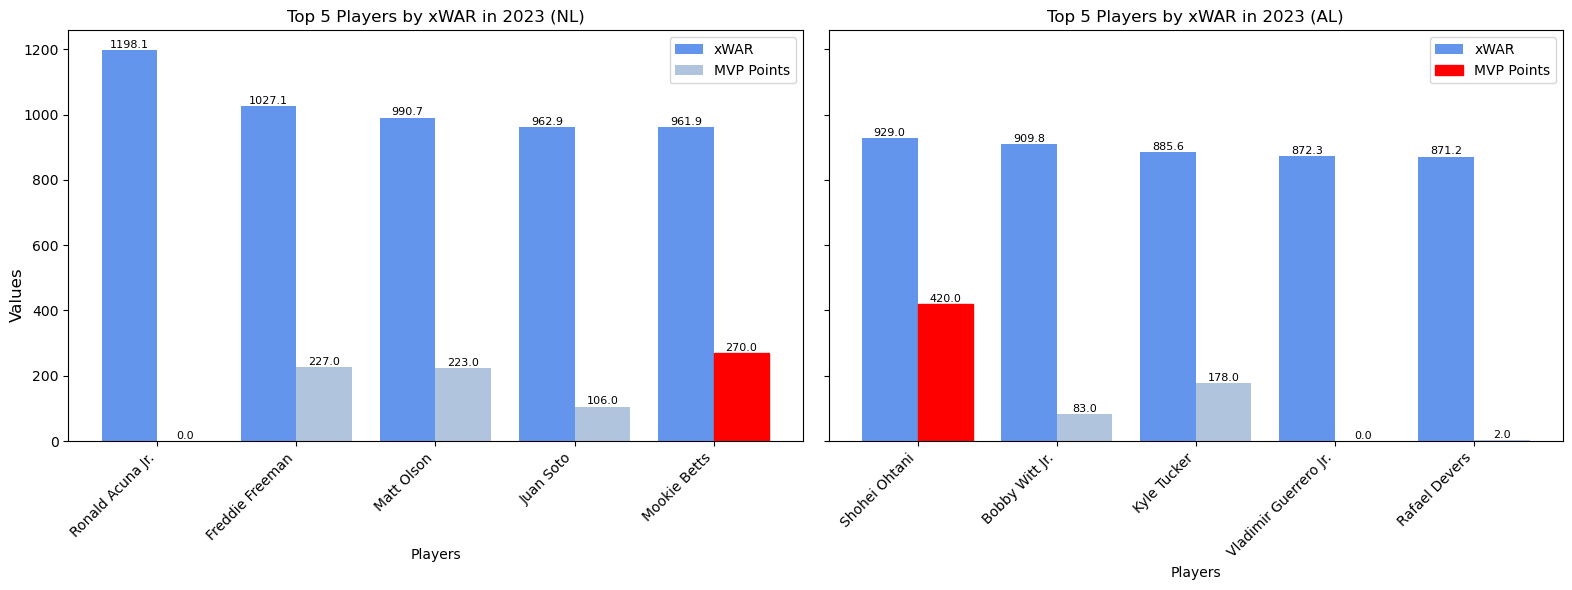

In [58]:
mvp_votes_2023 = [
    {"player_name": "Shohei Ohtani", "points": 420},
    {"player_name": "Corey Seager", "points": 264},
    {"player_name": "Marcus Semien", "points": 216},
    {"player_name": "Julio Rodríguez", "points": 197},
    {"player_name": "Kyle Tucker", "points": 178},
    {"player_name": "Yandy Díaz", "points": 137},
    {"player_name": "Bobby Witt Jr.", "points": 83},
    {"player_name": "Gunnar Henderson", "points": 77},
    {"player_name": "Adley Rutschman", "points": 50},
    {"player_name": "José Ramírez", "points": 40},
    {"player_name": "Luis Robert Jr.", "points": 21},
    {"player_name": "Yordan Alvarez", "points": 16},
    {"player_name": "Adolis García", "points": 14},
    {"player_name": "Aaron Judge", "points": 7},
    {"player_name": "Bo Bichette", "points": 5},
    {"player_name": "J.P. Crawford", "points": 5},
    {"player_name": "Cal Raleigh", "points": 2},
    {"player_name": "Rafael Devers", "points": 2},
    {"player_name": "Isaac Paredes", "points": 2},
    {"player_name": "Alex Bregman", "points": 1},
    {"player_name": "Josh Naylor", "points": 1},
    {"player_name": "Ronald Acuña Jr.", "points": 420},
    {"player_name": "Mookie Betts", "points": 270},
    {"player_name": "Freddie Freeman", "points": 227},
    {"player_name": "Matt Olson", "points": 223},
    {"player_name": "Corbin Carroll", "points": 165},
    {"player_name": "Juan Soto", "points": 106},
    {"player_name": "Austin Riley", "points": 68},
    {"player_name": "Luis Arraez", "points": 67},
    {"player_name": "Francisco Lindor", "points": 52},
    {"player_name": "Cody Bellinger", "points": 49},
    {"player_name": "William Contreras", "points": 39},
    {"player_name": "Bryce Harper", "points": 36},
    {"player_name": "Fernando Tatis Jr.", "points": 5},
    {"player_name": "Ha-Seong Kim", "points": 5},
    {"player_name": "Ozzie Albies", "points": 4},
    {"player_name": "Logan Webb", "points": 3},
    {"player_name": "Pete Alonso", "points": 3},
    {"player_name": "Marcell Ozuna", "points": 2},
    {"player_name": "Dansby Swanson", "points": 2},
    {"player_name": "Kyle Schwarber", "points": 2},
    {"player_name": "Christian Walker", "points": 1},
    {"player_name": "TJ Friedl", "points": 1},
    {"player_name": "Nick Castellanos", "points": 1}
]

# Create DataFrame
mvp_votes_2023 = pd.DataFrame(mvp_votes_2023)
data_2023 = all_data[all_data['year'] == 2023]

# Filter data by league
leagues = ['NL', 'AL']
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, league in enumerate(leagues):
    # Filter for the league
    league_data = data_2023[data_2023['League'] == league]
    
    # Select the top 5 players by xWAR for this league
    top_5_xWAR = league_data.nlargest(5, 'xWAR')
    
    # Merge with MVP votes
    merged_data = top_5_xWAR.merge(mvp_votes_2023, on='player_name', how='left')
    
    # Fill NaN MVP points with 0
    merged_data['points'] = merged_data['points'].fillna(0)
    
    # Get the top 2 MVP players in this league
    mvp_player = merged_data.nlargest(1, 'points')['player_name'].values
    
    # Bar positions
    x = np.arange(len(merged_data))
    width = 0.4
    
    # Bar chart for xWAR and MVP Points
    ax = axes[i]
    xwar_bars = ax.bar(x - width/2, merged_data['xWAR'], width, label='xWAR', color='cornflowerblue')
    points_bars = []
    
    for j, bar in enumerate(ax.bar(x + width/2, merged_data['points'], width, label='MVP Points', color='lightsteelblue')):
        if merged_data['player_name'].iloc[j] in mvp_player:
            bar.set_color('red')  # Highlight top 2 players
        points_bars.append(bar)
    
    # Add labels and title
    ax.set_xlabel('Players')
    ax.set_title(f'Top 5 Players by xWAR in 2023 ({league})')
    ax.set_xticks(x)
    ax.set_xticklabels(merged_data['player_name'], rotation=45, ha='right')
    ax.legend()
    
    # Annotate bars
    for bar in xwar_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)
    for bar in points_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)

# Shared y-axis label
fig.supylabel('Values')
plt.tight_layout()
plt.show()

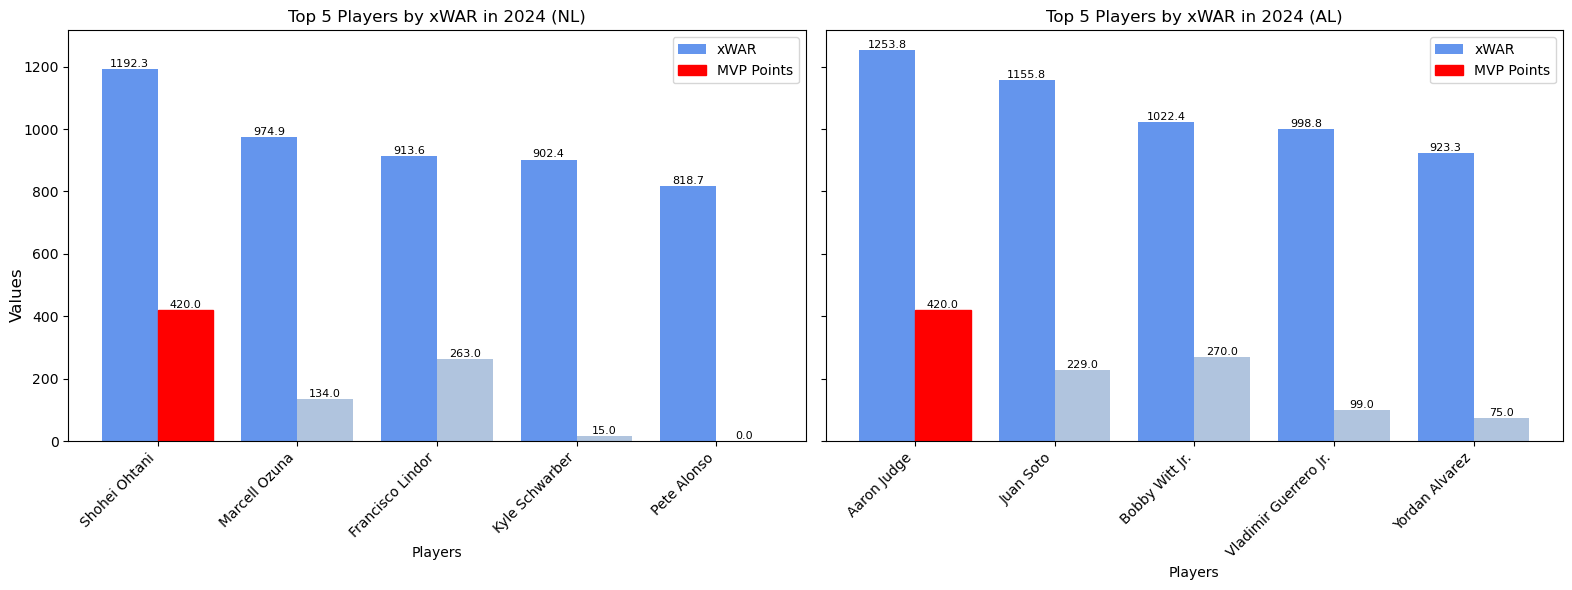

In [59]:
mvp_votes_2024 = [
    {"player_name": "Aaron Judge", "points": 420},
    {"player_name": "Bobby Witt Jr.", "points": 270},
    {"player_name": "Juan Soto", "points": 229},
    {"player_name": "Gunnar Henderson", "points": 208},
    {"player_name": "José Ramírez", "points": 184},
    {"player_name": "Vladimir Guerrero Jr.", "points": 99},
    {"player_name": "Jarren Duran", "points": 90},
    {"player_name": "Yordan Alvarez", "points": 75},
    {"player_name": "Brent Rooker", "points": 40},
    {"player_name": "Cal Raleigh", "points": 12},
    {"player_name": "Rafael Devers", "points": 5},
    {"player_name": "Anthony Santander", "points": 4},
    {"player_name": "Jose Altuve", "points": 2},
    {"player_name": "Corey Seager", "points": 1},
    {"player_name": "Shohei Ohtani", "points": 420},
    {"player_name": "Francisco Lindor", "points": 263},
    {"player_name": "Ketel Marte", "points": 229},
    {"player_name": "Marcell Ozuna", "points": 134},
    {"player_name": "William Contreras", "points": 132},
    {"player_name": "Bryce Harper", "points": 130},
    {"player_name": "Elly De La Cruz", "points": 89},
    {"player_name": "Jackson Merrill", "points": 57},
    {"player_name": "Willy Adames", "points": 54},
    {"player_name": "Matt Chapman", "points": 37},
    {"player_name": "Mookie Betts", "points": 24},
    {"player_name": "Jurickson Profar", "points": 23},
    {"player_name": "Kyle Schwarber", "points": 15},
    {"player_name": "Manny Machado", "points": 12},
    {"player_name": "Freddie Freeman", "points": 6},
    {"player_name": "Luis Arraez", "points": 4},
    {"player_name": "Teoscar Hernández", "points": 3},
    {"player_name": "Ezequiel Tovar", "points": 3},
    {"player_name": "Jackson Chourio", "points": 1},
]

# Convert data to DataFrame
mvp_votes_2024 = pd.DataFrame(mvp_votes_2024)
data_2024 = all_data[all_data['year'] == 2024]

# Filter data by league
leagues = ['NL', 'AL']
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, league in enumerate(leagues):
    # Filter for the league
    league_data = data_2024[data_2024['League'] == league]
    
    # Select the top 5 players by xWAR for this league
    top_5_xWAR = league_data.nlargest(5, 'xWAR')
    
    # Merge with MVP votes
    merged_data = top_5_xWAR.merge(mvp_votes_2024, on='player_name', how='left')
    
    # Fill NaN MVP points with 0
    merged_data['points'] = merged_data['points'].fillna(0)
    
    # Get the top 2 MVP players in this league
    mvp_player = merged_data.nlargest(1, 'points')['player_name'].values
    
    # Bar positions
    x = np.arange(len(merged_data))
    width = 0.4
    
    # Bar chart for xWAR and MVP Points
    ax = axes[i]
    xwar_bars = ax.bar(x - width/2, merged_data['xWAR'], width, label='xWAR', color='cornflowerblue')
    points_bars = []
    
    for j, bar in enumerate(ax.bar(x + width/2, merged_data['points'], width, label='MVP Points', color='lightsteelblue')):
        if merged_data['player_name'].iloc[j] in mvp_player:
            bar.set_color('red')  # Highlight top 2 players
        points_bars.append(bar)
    
    # Add labels and title
    ax.set_xlabel('Players')
    ax.set_title(f'Top 5 Players by xWAR in 2024 ({league})')
    ax.set_xticks(x)
    ax.set_xticklabels(merged_data['player_name'], rotation=45, ha='right')
    ax.legend()
    
    # Annotate bars
    for bar in xwar_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)
    for bar in points_bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
                ha='center', va='bottom', fontsize=8)

# Shared y-axis label
fig.supylabel('Values')
plt.tight_layout()
plt.show()

In [60]:
# filtered_df = total_data[total_data['player_name'] == 'Juan Soto']
# filtered_df

In [61]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Initialize the prediction DataFrame
predicted_values = pd.DataFrame()

# Iterate through each player
for player in all_data['player_name'].unique():
    player_data = all_data[all_data['player_name'] == player].sort_values('year')
    
    # Check if the player has 2 or more rows of data
    if len(player_data) < 2:
        #print(f"Skipping player {player} due to insufficient data.")
        continue
    
    # Features and targets
    X = player_data[['year']]
    y = player_data[['est_ba', 'est_slg', 'est_woba', 'est_ops', 'est_iso', 'brl_percent']]
    
    # Initialize dictionary to hold predictions
    predictions = {}

    # Train the model for each stat
    for col in y.columns:
        model = XGBRegressor(random_state=42)
        
        # If the player has exactly 2 rows, use both for training
        if len(player_data) == 2:
            model.fit(X, y[col])
        else:
            # Train on all rows except the last one (leave the last for validation)
            model.fit(X.iloc[:-1], y[col].iloc[:-1])
        
        # Predict the next year (2025)
        predictions[f'predicted_{col}'] = model.predict([[2025]])[0]
    
    # Calculate average PA for the previous years (2021-2024)
    avg_pa = player_data['pa'].mean()

    # Check if the player has data for the year 2024
    mlb_salaries_2025['year'] = 2025
    player_salary_data = mlb_salaries_2025[(mlb_salaries_2025['year'] == 2025) & 
                                       (mlb_salaries_2025['player_name'] == player)]

    if not player_salary_data.empty:
        # Use data from mlb_salaries_2025 for 2025
        players_team = player_salary_data['players_team'].iloc[0]
        primary_position = player_salary_data['primary_position'].iloc[0]
        players_contract = player_salary_data['players_yearly_salary'].iloc[0]
    else:
        # Fallback: Use data from player_data for 2024
        player_2024_data = player_data[player_data['year'] == 2024]
        if not player_2024_data.empty:
            players_team = player_2024_data['players_team'].iloc[0]
            primary_position = player_2024_data['primary_position'].iloc[0]
            players_contract = player_2024_data['players_yearly_salary'].iloc[0]
        else:
            # Default values if 2024 data is also missing
            players_team = 'Unknown'
            primary_position = 'Unknown'
            players_contract = 'Unknown'

    
    # Add predictions to the DataFrame
    predictions['player_name'] = player
    predictions['year'] = 2025
    predictions['pa'] = int(avg_pa)  # Convert average PA to an integer
    predictions['players_team'] = players_team
    predictions['primary_position'] = primary_position
    predictions['players_yearly_salary'] = players_contract
    
    predicted_values = pd.concat([predicted_values, pd.DataFrame([predictions])])

# Reset index and inspect
predicted_values.reset_index(drop=True, inplace=True)

# Reorder columns for better readability
predicted_values = predicted_values[['player_name', 'year', 'pa', 'predicted_est_ba', 'predicted_est_slg', 'predicted_est_woba', 
                                     'predicted_est_ops', 'predicted_est_iso', 'predicted_brl_percent', 
                                     'players_team', 'primary_position', 'players_yearly_salary']]
predicted_values

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary
0,Jarren Duran,2025,440,0.267050,0.400070,0.318008,0.719140,0.133500,0.053891,BOS,CF,4110000.0
1,Shohei Ohtani,2025,658,0.293081,0.634002,0.424951,1.060062,0.340199,0.195452,LAD,SP/DH,70000000.0
2,Gunnar Henderson,2025,670,0.282039,0.491126,0.373116,0.865070,0.210000,0.113000,BAL,SS,800000.0
3,Marcus Semien,2025,729,0.261030,0.426453,0.332301,0.759508,0.164495,0.065917,TEX,2B,26000000.0
4,Juan Soto,2025,684,0.283573,0.537369,0.407575,0.945525,0.253014,0.129573,NYM,RF,51875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
446,Luis Torrens,2025,272,0.236886,0.333961,0.284912,0.617943,0.097870,0.049906,NYM,C,1700000
447,Hanser Alberto,2025,207,0.216950,0.304952,0.234988,0.538870,0.088978,0.015947,Unknown,Unknown,Unknown
448,Kurt Suzuki,2025,203,0.191925,0.281915,0.255886,0.536866,0.090967,0.035887,Unknown,Unknown,Unknown
449,Lorenzo Cain,2025,221,0.200890,0.253943,0.230880,0.483970,0.053893,0.000980,Unknown,Unknown,Unknown


In [62]:
# Calculate xWAR
predicted_values['xWAR'] = (
    predicted_values['pa'] * (
        predicted_values['predicted_est_woba'] +
        predicted_values['predicted_est_slg'] +
        predicted_values['predicted_est_ba'] +
        predicted_values['predicted_brl_percent']
    )
)

predicted_values['xWAR'] = pd.to_numeric(predicted_values['xWAR'], errors='coerce')
predicted_values['players_yearly_salary'] = pd.to_numeric(predicted_values['players_yearly_salary'], errors='coerce')
predicted_values['players_yearly_salary'].fillna(760000, inplace=True)
predicted_values['xWAR'].fillna(0, inplace=True)
predicted_values['xWAR_Per_Dollar'] = predicted_values['xWAR'] / predicted_values['players_yearly_salary']

predicted_values

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar
0,Jarren Duran,2025,440,0.267050,0.400070,0.318008,0.719140,0.133500,0.053891,BOS,CF,4110000.0,457.168250,0.000111
1,Shohei Ohtani,2025,658,0.293081,0.634002,0.424951,1.060062,0.340199,0.195452,LAD,SP/DH,70000000.0,1018.246146,0.000015
2,Gunnar Henderson,2025,670,0.282039,0.491126,0.373116,0.865070,0.210000,0.113000,BAL,SS,800000.0,843.718935,0.001055
3,Marcus Semien,2025,729,0.261030,0.426453,0.332301,0.759508,0.164495,0.065917,TEX,2B,26000000.0,791.476021,0.000030
4,Juan Soto,2025,684,0.283573,0.537369,0.407575,0.945525,0.253014,0.129573,NYM,RF,51875000.0,928.933100,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Luis Torrens,2025,272,0.236886,0.333961,0.284912,0.617943,0.097870,0.049906,NYM,C,1700000.0,246.340891,0.000145
447,Hanser Alberto,2025,207,0.216950,0.304952,0.234988,0.538870,0.088978,0.015947,Unknown,Unknown,760000.0,159.977206,0.000210
448,Kurt Suzuki,2025,203,0.191925,0.281915,0.255886,0.536866,0.090967,0.035887,Unknown,Unknown,760000.0,155.419443,0.000204
449,Lorenzo Cain,2025,221,0.200890,0.253943,0.230880,0.483970,0.053893,0.000980,Unknown,Unknown,760000.0,151.759129,0.000200


In [63]:
filtered_df = predicted_values[predicted_values['player_name'] == 'Steven Kwan']
filtered_df

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar
95,Steven Kwan,2025,632,0.281004,0.357126,0.316057,0.674039,0.075079,0.011921,CLE,LF,4000000.0,610.580912,0.000153


In [64]:
prediction_values_copy = predicted_values.copy()

# Exclude players with no team
prediction_values_copy = prediction_values_copy[prediction_values_copy['players_team'].notna() & (prediction_values_copy['players_team'] != 'Unknown')]

# Sort by xWAR per dollar and get the top 10
predicted_values_sorted = prediction_values_copy.sort_values(by='xWAR_Per_Dollar', ascending=False)
bang_for_buck_players = predicted_values_sorted.head(10)

# Display top players with the best bang for your buck
bang_for_buck_players

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar
2,Gunnar Henderson,2025,670,0.282039,0.491126,0.373116,0.865070,0.210000,0.113000,BAL,SS,800000.0,843.718935,0.001055
31,Spencer Steer,2025,660,0.235874,0.379866,0.315925,0.694923,0.144917,0.064921,CIN,LF,800000.0,657.746816,0.000822
8,Elly De La Cruz,2025,561,0.240000,0.427008,0.327072,0.755132,0.187008,0.126042,CIN,SS,800000.0,628.388350,0.000785
69,Christopher Morel,2025,488,0.246004,0.488110,0.342024,0.831131,0.241088,0.158072,TB,3B,800000.0,602.294662,0.000753
194,Spencer Torkelson,2025,489,0.252148,0.486063,0.351089,0.838031,0.233024,0.140061,DET,1B,800000.0,601.157440,0.000751
82,Riley Greene,2025,472,0.288020,0.498046,0.364050,0.863006,0.209048,0.112126,DET,LF,800000.0,595.778261,0.000745
101,Shea Langeliers,2025,512,0.240116,0.455053,0.327116,0.783045,0.214150,0.128943,ATH,C,800000.0,589.429260,0.000737
64,Yainer Diaz,2025,498,0.298080,0.458860,0.339917,0.797911,0.159971,0.076891,HOU,C,800000.0,584.526572,0.000731
77,Oneil Cruz,2025,480,0.262088,0.460012,0.339034,0.800120,0.197080,0.156150,PIT,CF/SS,800000.0,584.296360,0.000730
72,Brenton Doyle,2025,517,0.253110,0.436059,0.328006,0.765134,0.182111,0.104075,COL,CF/OF,800000.0,579.686514,0.000725


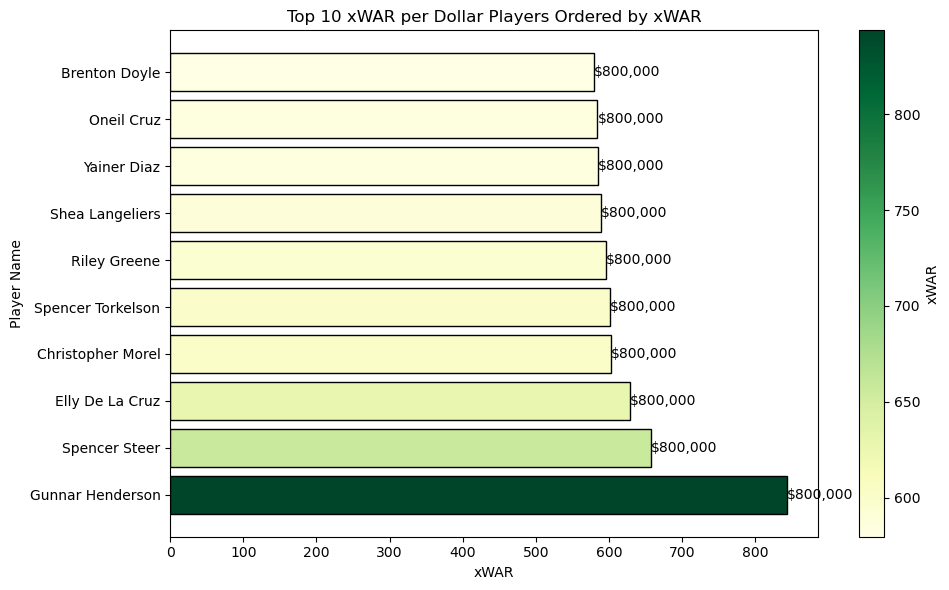

In [65]:
import matplotlib.pyplot as plt
import matplotlib as mpl

predicted_values_sorted = bang_for_buck_players.sort_values(by='xWAR', ascending=False)
bang_for_buck_players = predicted_values_sorted.head(10)

# Create a colormap (here using 'YlGn' which is yellow to green)
cmap = mpl.colormaps['YlGn']  # Updated approach to get the colormap

# Normalize the xWAR values for mapping to the colormap
norm = plt.Normalize(bang_for_buck_players['xWAR'].min(), bang_for_buck_players['xWAR'].max())

# Plotting horizontal bar chart ordered by xWAR
fig, ax = plt.subplots(figsize=(10, 6))

# Use the colormap to assign colors based on xWAR
bars = ax.barh(bang_for_buck_players['player_name'], bang_for_buck_players['xWAR'], 
                color=cmap(norm(bang_for_buck_players['xWAR'])), edgecolor='black')

# Add labels to each bar with the player's contract
for index, value in enumerate(bang_for_buck_players['xWAR']):
    ax.text(value, index, f"${bang_for_buck_players['players_yearly_salary'].iloc[index]:,.0f}", va='center')

# Labeling the axes and title
ax.set_xlabel('xWAR')
ax.set_ylabel('Player Name')
ax.set_title('Top 10 xWAR per Dollar Players Ordered by xWAR')

# Show the colorbar to indicate the gradient scale
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('xWAR')

# Show the plot
plt.tight_layout()
plt.show()

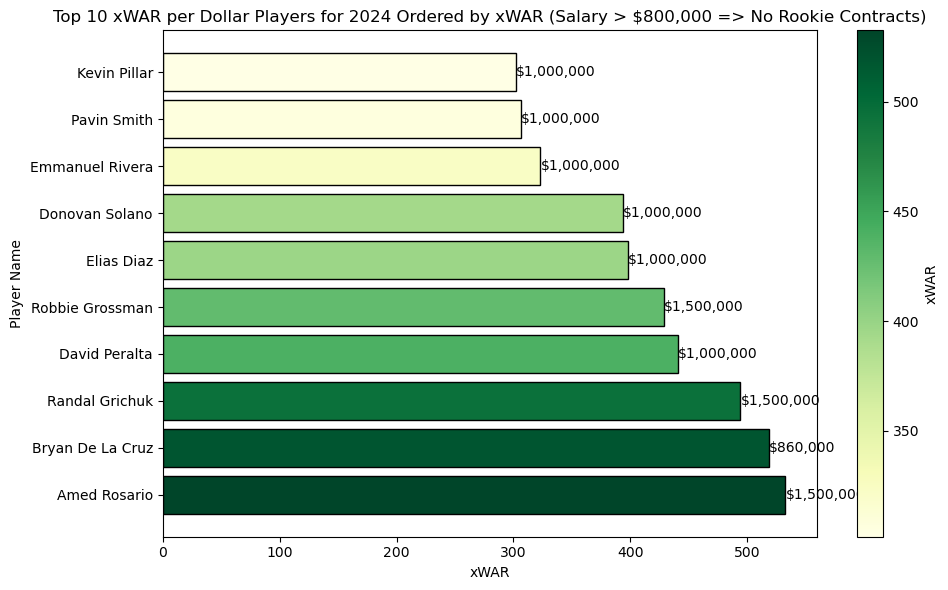

In [66]:
import matplotlib as mpl

predicted_values_copy = predicted_values.copy()  # Create a copy to avoid SettingWithCopyWarning

# Filter out players with a yearly salary less than 800,000
predicted_values_nr = predicted_values_copy[predicted_values_copy['players_yearly_salary'] > 800000].copy()

# Exclude players with no team
predicted_values_nr = predicted_values_nr[predicted_values_nr['players_team'].notna() & (predicted_values_nr['players_team'] != 'Unknown')]

# Sort by xWAR in descending order and get the top 10 players
predicted_values_nr_sorted = predicted_values_nr.sort_values(by='xWAR_Per_Dollar', ascending=False)
bang_for_buck_players_no_rookies = predicted_values_nr_sorted.head(10)

# Sort by xWAR and pick the top 10
bang_for_buck_players_no_rookies_sorted = bang_for_buck_players_no_rookies.sort_values(by='xWAR', ascending=False)
bbb_players_nr = bang_for_buck_players_no_rookies_sorted.head(10)

# Create a colormap (here using 'YlGn' which is yellow to green)
cmap = mpl.colormaps['YlGn']  # Updated approach to get the colormap

# Normalize the xWAR values for mapping to the colormap
norm = plt.Normalize(bbb_players_nr['xWAR'].min(), bbb_players_nr['xWAR'].max())

# Plotting horizontal bar chart ordered by xWAR for players with salary > 800,000
fig, ax = plt.subplots(figsize=(10, 6))

# Use the colormap to assign colors based on xWAR
bars = ax.barh(bbb_players_nr['player_name'], bbb_players_nr['xWAR'], 
                color=cmap(norm(bbb_players_nr['xWAR'])), edgecolor='black')

# Add labels to each bar with the player's contract
for index, value in enumerate(bbb_players_nr['xWAR']):
    ax.text(value, index, f"${bbb_players_nr['players_yearly_salary'].iloc[index]:,.0f}", va='center')

# Labeling the axes and title
ax.set_xlabel('xWAR')
ax.set_ylabel('Player Name')
ax.set_title('Top 10 xWAR per Dollar Players for 2024 Ordered by xWAR (Salary > $800,000 => No Rookie Contracts)')

# Show the colorbar to indicate the gradient scale
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('xWAR')

# Show the plot
plt.tight_layout()
plt.show()

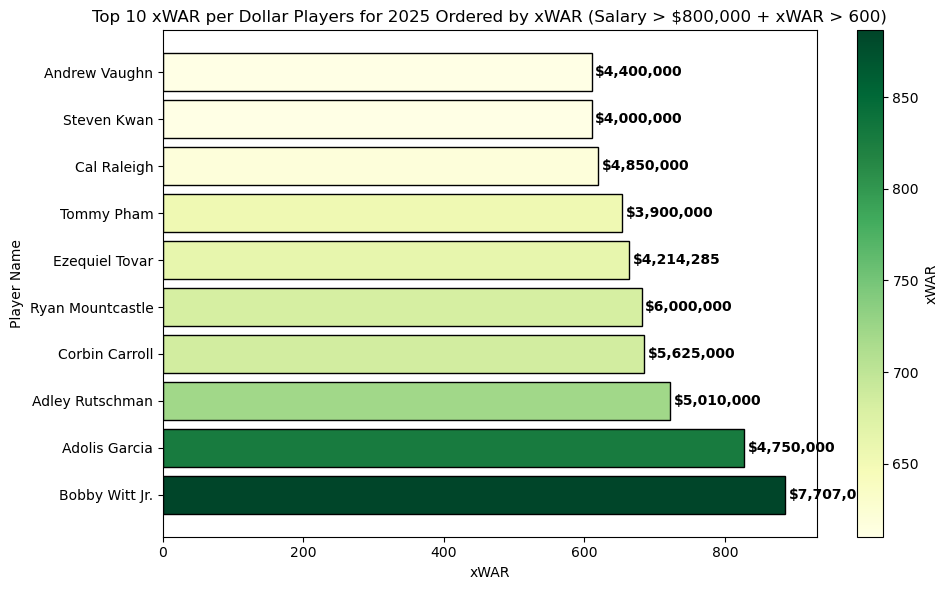

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl

predicted_values_copy = predicted_values.copy()  # Create a copy to avoid SettingWithCopyWarning

# Filter players with salary > 800,000 and xWAR > 600
predicted_values_nr = predicted_values_copy[predicted_values_copy['players_yearly_salary'] > 800000].copy()
predicted_values_nr_v2 = predicted_values_nr[predicted_values_nr['xWAR'] > 600].copy()

# Exclude players with no team
predicted_values_nr_v2 = predicted_values_nr_v2[predicted_values_nr_v2['players_team'].notna() & (predicted_values_nr_v2['players_team'] != 'Unknown')]

# Sort by xWAR_Per_Dollar in descending order and get the top 10 players
predicted_values_nr_v2_sorted = predicted_values_nr_v2.sort_values(by='xWAR_Per_Dollar', ascending=False)
bang_for_buck_players_no_rookies = predicted_values_nr_v2_sorted.head(10)

# Sort by xWAR and pick the top 10
bang_for_buck_players_no_rookies_sorted = bang_for_buck_players_no_rookies.sort_values(by='xWAR', ascending=False)
bbb_players_nr = bang_for_buck_players_no_rookies_sorted.head(10)

# Create a colormap (green gradient)
cmap = mpl.colormaps['YlGn']  # You can change this to another colormap if desired

# Normalize the xWAR values for mapping to the colormap
norm = plt.Normalize(bbb_players_nr['xWAR'].min(), bbb_players_nr['xWAR'].max())

# Plotting horizontal bar chart ordered by xWAR
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars with gradient coloring
bars = ax.barh(bbb_players_nr['player_name'], bbb_players_nr['xWAR'], 
                color=cmap(norm(bbb_players_nr['xWAR'])), edgecolor='black')

# Add labels to each bar with the player's contract (players_yearly_salary)
for index, value in enumerate(bbb_players_nr['xWAR']):
    salary = f"${bbb_players_nr['players_yearly_salary'].iloc[index]:,.0f}"
    # Add text with the player's yearly salary inside the bar
    ax.text(value + 5, index, salary, va='center', ha='left', color='black', fontweight='bold')

# Labeling the axes and title
ax.set_xlabel('xWAR')
ax.set_ylabel('Player Name')
ax.set_title('Top 10 xWAR per Dollar Players for 2025 Ordered by xWAR (Salary > $800,000 + xWAR > 600)')

# Show the colorbar to indicate the gradient scale
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('xWAR')

# Show the plot
plt.tight_layout()
plt.show()

In [68]:
all_data_copy = all_data.copy()
all_data_copy = all_data_copy[['player_name', 'year', 'pa', 'est_ba', 'est_slg', 'est_woba', 'est_ops', 'est_iso',
                               'brl_percent', 'players_yearly_salary', 'players_team', 'primary_position', 'xWAR']]
predicted_values_copy = predicted_values.copy()
predicted_values_copy.columns = predicted_values_copy.columns.str.replace('predicted_', '', regex=False)
predicted_values_copy = predicted_values_copy[['player_name', 'year', 'pa', 'est_ba', 'est_slg', 'est_woba', 'est_ops', 'est_iso',
                               'brl_percent', 'players_yearly_salary', 'players_team', 'primary_position', 'xWAR']]
total_data = pd.concat([all_data_copy, predicted_values_copy], ignore_index=True)
total_data

,player_name,year,pa,est_ba,est_slg,est_woba,est_ops,est_iso,brl_percent,players_yearly_salary,players_team,primary_position,xWAR
0,Jarren Duran,2024,735,0.275000,0.453000,0.342000,0.795000,0.178000,0.093000,760000,BOS,CF,854.805000
1,Shohei Ohtani,2024,731,0.314000,0.660000,0.442000,1.102000,0.346000,0.215000,70000000,LAD,DH,1192.261000
2,Gunnar Henderson,2024,719,0.283000,0.492000,0.374000,0.866000,0.209000,0.112000,756200,BAL,SS,906.659000
3,Marcus Semien,2024,718,0.251000,0.391000,0.313000,0.704000,0.140000,0.066000,26000000,TEX,2B,733.078000
4,Juan Soto,2024,713,0.316000,0.646000,0.462000,1.108000,0.330000,0.197000,31000000,NYY,RF,1155.773000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,Luis Torrens,2025,272,0.236886,0.333961,0.284912,0.617943,0.097870,0.049906,1700000.0,NYM,C,246.340891
2073,Hanser Alberto,2025,207,0.216950,0.304952,0.234988,0.538870,0.088978,0.015947,760000.0,Unknown,Unknown,159.977206
2074,Kurt Suzuki,2025,203,0.191925,0.281915,0.255886,0.536866,0.090967,0.035887,760000.0,Unknown,Unknown,155.419443
2075,Lorenzo Cain,2025,221,0.200890,0.253943,0.230880,0.483970,0.053893,0.000980,760000.0,Unknown,Unknown,151.759129


In [69]:
b = total_data[total_data['player_name'] == 'Bobby Witt Jr.']
b

,player_name,year,pa,est_ba,est_slg,est_woba,est_ops,est_iso,brl_percent,players_yearly_salary,players_team,primary_position,xWAR
5,Bobby Witt Jr.,2024,709,0.315000,0.577000,0.407000,0.984000,0.262000,0.143000,2707070,KC,SS,1022.378000
417,Bobby Witt Jr.,2023,694,0.294000,0.533000,0.369000,0.902000,0.239000,0.115000,745750,KC,SS,909.834000
847,Bobby Witt Jr.,2022,632,0.252000,0.427000,0.313000,0.740000,0.175000,0.087000,700000,KC,SS,681.928000
1631,Bobby Witt Jr.,2025,678,0.293042,0.532089,0.368077,0.901145,0.238104,0.114116,7707070.0,KC,SS,886.366273


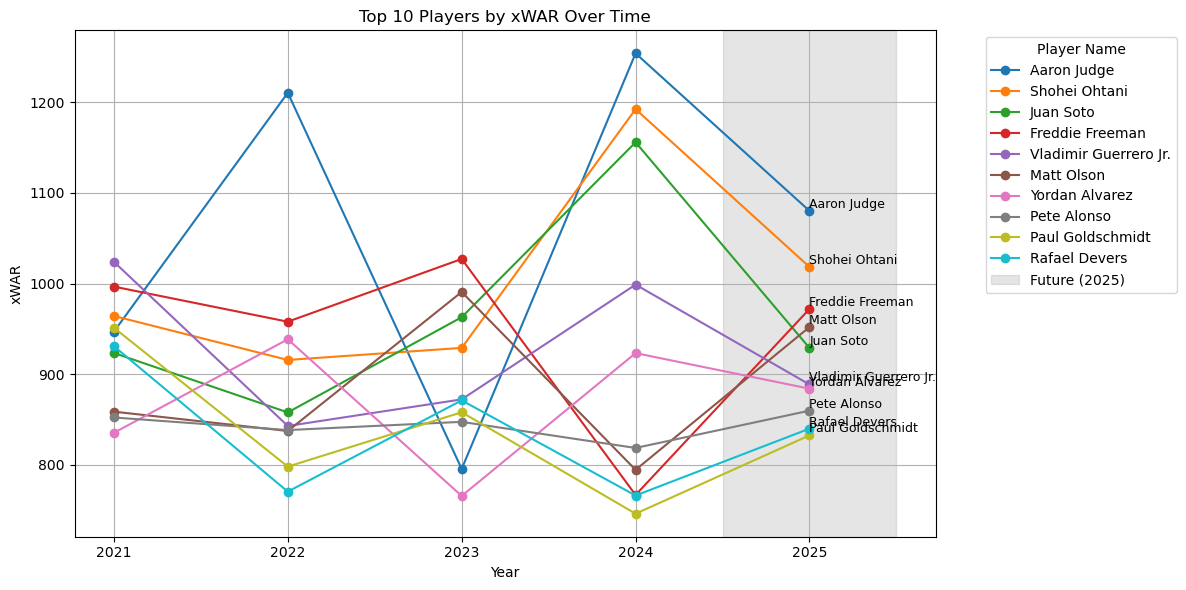

In [70]:
# Identify the top ten players based on total xWAR
top_players = (
    total_data.groupby("player_name")["xWAR"]
    .sum()
    .nlargest(10)
    .index
)

# league_average_xWAR = total_data["xWAR"].mean() 

# Filter the DataFrame for the top players
filtered_data = total_data[total_data["player_name"].isin(top_players)]

# Add missing years for continuity
all_years = range(2021, 2026)
filtered_data = (
    filtered_data.set_index(["player_name", "year"])
    .reindex(pd.MultiIndex.from_product([top_players, all_years], names=["player_name", "year"]))
    .reset_index()
)

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot lines and annotate player names
for player in filtered_data["player_name"].unique():
    player_data = filtered_data[filtered_data["player_name"] == player]
    plt.plot(player_data["year"], player_data["xWAR"], label=player, marker='o')

    # Annotate with player name at the last year (or other specific year)
    last_year_data = player_data[player_data["year"] == player_data["year"].max()]
    plt.text(last_year_data["year"].values[0], last_year_data["xWAR"].values[0],
             player, fontsize=9, verticalalignment='bottom', horizontalalignment='left')

# Add shading for 2025
plt.axvspan(2024.5, 2025.5, color='gray', alpha=0.2, label="Future (2025)")

# Add a red horizontal line for the league average xWAR
# plt.axhline(league_average_xWAR, color='red', linestyle='--', linewidth=2, label="League Average xWAR")

# Customize the plot
plt.title("Top 10 Players by xWAR Over Time")
plt.xlabel("Year")
plt.ylabel("xWAR")
plt.legend(title="Player Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [71]:
total_data

,player_name,year,pa,est_ba,est_slg,est_woba,est_ops,est_iso,brl_percent,players_yearly_salary,players_team,primary_position,xWAR
0,Jarren Duran,2024,735,0.275000,0.453000,0.342000,0.795000,0.178000,0.093000,760000,BOS,CF,854.805000
1,Shohei Ohtani,2024,731,0.314000,0.660000,0.442000,1.102000,0.346000,0.215000,70000000,LAD,DH,1192.261000
2,Gunnar Henderson,2024,719,0.283000,0.492000,0.374000,0.866000,0.209000,0.112000,756200,BAL,SS,906.659000
3,Marcus Semien,2024,718,0.251000,0.391000,0.313000,0.704000,0.140000,0.066000,26000000,TEX,2B,733.078000
4,Juan Soto,2024,713,0.316000,0.646000,0.462000,1.108000,0.330000,0.197000,31000000,NYY,RF,1155.773000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,Luis Torrens,2025,272,0.236886,0.333961,0.284912,0.617943,0.097870,0.049906,1700000.0,NYM,C,246.340891
2073,Hanser Alberto,2025,207,0.216950,0.304952,0.234988,0.538870,0.088978,0.015947,760000.0,Unknown,Unknown,159.977206
2074,Kurt Suzuki,2025,203,0.191925,0.281915,0.255886,0.536866,0.090967,0.035887,760000.0,Unknown,Unknown,155.419443
2075,Lorenzo Cain,2025,221,0.200890,0.253943,0.230880,0.483970,0.053893,0.000980,760000.0,Unknown,Unknown,151.759129


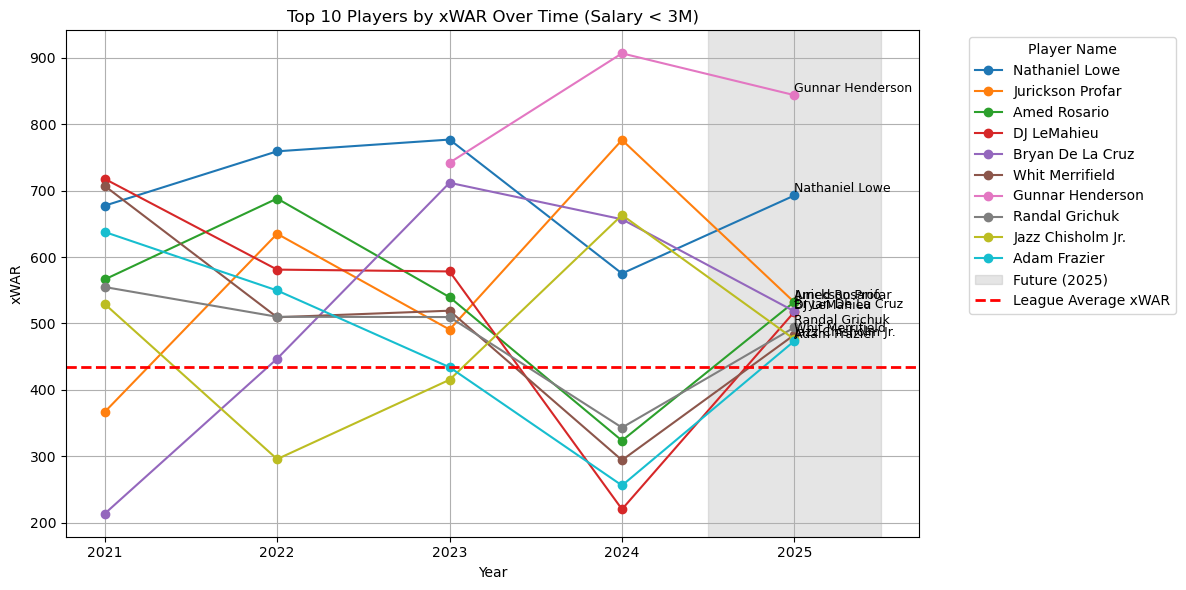

In [72]:
# Filter the DataFrame based on the salary condition
players_2025_under_3m = total_data[
    (total_data['year'] == 2025) & 
    (total_data['players_yearly_salary'] < 3000000) & 
    (total_data['player_name'] != 'Jose Abreu')
]["player_name"].unique()

# Filter the DataFrame for these player names
filtered_data = total_data[total_data["player_name"].isin(players_2025_under_3m)]

league_average_xWAR = total_data["xWAR"].mean() 

# Identify the top ten players based on total xWAR
top_players = (
    filtered_data.groupby("player_name")["xWAR"]
    .sum()
    .nlargest(10)
    .index
)

# Filter the DataFrame for the top players
filtered_data = filtered_data[filtered_data["player_name"].isin(top_players)]

# Add missing years for continuity
all_years = range(2021, 2026)
filtered_data = (
    filtered_data.set_index(["player_name", "year"])
    .reindex(pd.MultiIndex.from_product([top_players, all_years], names=["player_name", "year"]))
    .reset_index()
)

# Fill missing xWAR values with 0
# filtered_data["xWAR"].fillna(0, inplace=True)

# # Ensure xWAR values are finite
# filtered_data = filtered_data[filtered_data["xWAR"].notna()]

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot lines and annotate player names
for player in filtered_data["player_name"].unique():
    player_data = filtered_data[filtered_data["player_name"] == player]
    plt.plot(player_data["year"], player_data["xWAR"], label=player, marker='o')

    # Annotate with player name at the last year (or other specific year)
    last_year_data = player_data[player_data["year"] == player_data["year"].max()]
    if not last_year_data.empty:  # Ensure there's data to annotate
        plt.text(last_year_data["year"].values[0], last_year_data["xWAR"].values[0],
                 player, fontsize=9, verticalalignment='bottom', horizontalalignment='left')

# Add shading for 2025
plt.axvspan(2024.5, 2025.5, color='gray', alpha=0.2, label="Future (2025)")

plt.axhline(league_average_xWAR, color='red', linestyle='--', linewidth=2, label="League Average xWAR")

# Customize the plot
plt.title("Top 10 Players by xWAR Over Time (Salary < 3M)")
plt.xlabel("Year")
plt.ylabel("xWAR")
plt.legend(title="Player Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [73]:
a = merged_data2024[merged_data2024['player_name'].str.contains('Julio R', na=False)]
a

,player_name,player_id,year_x,pa,bip,ba,est_ba,est_ba_minus_ba_diff,slg,est_slg,...,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa,year_y,players_yearly_salary,players_team,primary_position
68,Julio Rodriguez,677594,2024,613,413,0.273,0.275,-0.002,0.409,0.463,...,406.0,200,48.4,42,10.2,6.9,2024,11912500,SEA,CF


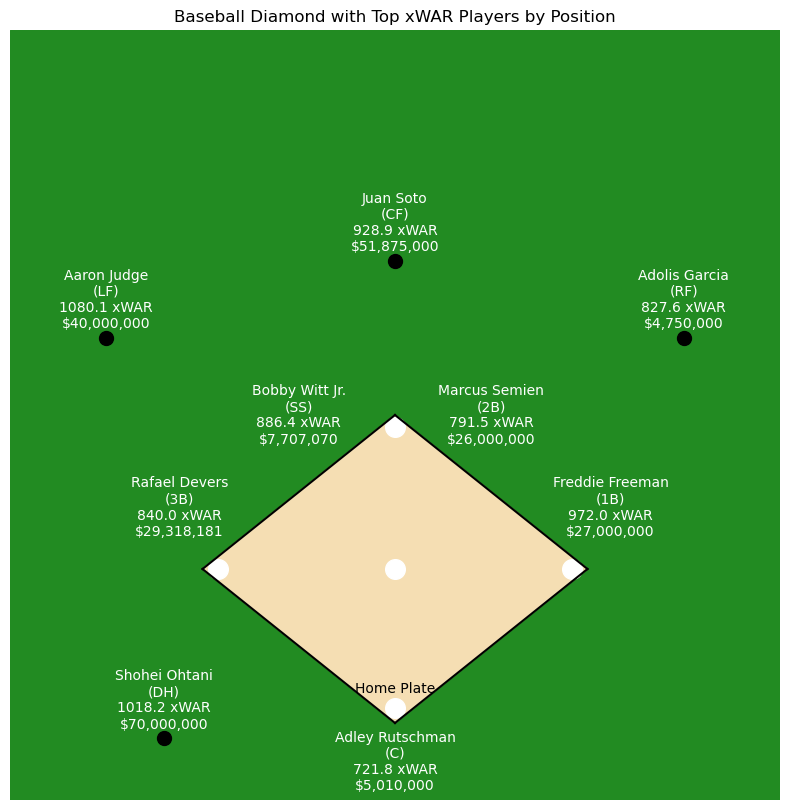

In [74]:
import matplotlib.patches as patches
# Clean up the 'primary_position' column
# Resolve mixed positions by taking the first value, and handle non-string types
def clean_position(pos):
    if isinstance(pos, str):
        return pos.split('/')[0]
    return pos  # In case the position is NaN or a number, return as is

predicted_values['primary_position'] = predicted_values['primary_position'].apply(clean_position)
predicted_values['primary_position'] = predicted_values['primary_position'].str.strip()
predicted_values['players_team'] = predicted_values['players_team'].str.strip()
predicted_values['primary_position'] = predicted_values['primary_position'].replace('SP', 'DH')

# Consolidate outfield positions into 'OF'
predicted_values['primary_position'] = predicted_values['primary_position'].replace({'LF': 'OF', 'CF': 'OF', 'RF': 'OF'})

# Sort the data by xWAR to get the top player for each position
best_players = predicted_values.loc[predicted_values.groupby('primary_position')['xWAR'].idxmax()]
best_players = best_players[(best_players['primary_position'] != 'Unknown')]

# Assign the top three outfielders (OF) to their respective outfield positions
outfield_players = predicted_values[predicted_values['primary_position'] == 'OF']
outfield_players = outfield_players.sort_values(by='xWAR', ascending=False).head(3)

# Get the list of top 3 outfield players
outfield_players_list = outfield_players['player_name'].tolist()

# Define the outfield positions
outfield_positions = ['OF_LF', 'OF_CF', 'OF_RF']

# Assign outfield players to the positions directly
for i, pos in enumerate(outfield_positions):
    if i < len(outfield_players_list):  # Check if there are enough outfield players
        # Assign the player to the respective position in the best_players DataFrame
        best_players.loc[best_players['primary_position'] == 'OF', 'player_name'] = outfield_players_list[i]

# Set up the baseball diamond plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define the coordinates for the bases (forming a diamond shape)
home_plate = (0.5, 0.1)
first_base = (0.25, 0.30)
second_base = (0.5, 0.50)
third_base = (0.75, 0.30)

# Draw the infield (sand color)
infield = patches.Polygon(
    [home_plate, first_base, second_base, third_base, home_plate],
    closed=True,
    color='#f5deb3',  # Sand-like color
    zorder=1
)
ax.add_patch(infield)

# Define the outfield (green grass color)
outfield = patches.Rectangle(
    (0, 0), 1, 1,  # Bottom-left corner and width, height
    color='forestgreen',  # Grass-like color
    zorder=0
)
ax.add_patch(outfield)

# Define the coordinates for the baseball diamond (adjusted based on your clarification)
diamond_points = {
    'C': (0.5, 0.05),  # Catcher (bottom center)
    '3B': (0.22, 0.38),  # First base (bottom right)
    '2B': (0.625, 0.5),  # Second base (now swapped with CF, moved slightly up)
    '1B': (0.78, 0.38),  # Third base (bottom left)
    'SS': (0.375, 0.5),  # Shortstop (slightly left of second base, adjusted lower)
    'OF_LF': (0.125, 0.65),  # Left field (above third base)
    'OF_CF': (0.5, 0.75),  # Center field (above second base, swapped)
    'OF_RF': (0.875, 0.65),  # Right field (above first base)
    'DH': (0.2, 0.13)    # Designated Hitter (DH) at the bottom center (near the catcher)
}

# Plot the infield (forming a box on its side)
ax.plot([0.25, 0.5], [0.3, 0.5], color="black")  # 1B to 2B line
ax.plot([0.75, 0.5], [0.3, 0.5], color="black")  # 3B to 2B line
ax.plot([0.5, 0.25], [0.1, 0.3], color="black")  # Catcher to 1st base
ax.plot([0.5, 0.75], [0.1, 0.3], color="black")  # Catcher to 3rd base

# Plot the bases and positions
ax.scatter([0.5, 0.27, 0.73, 0.5, 0.5], 
           [0.12, 0.3, 0.3, 0.485, 0.3], color="white", s=200)  # Bases and positions
ax.scatter([0.5, 0.125, 0.875, 0.2], 
           [0.7, 0.6, 0.6, 0.08], color="black", s=100)  # Bases and positions
ax.annotate("Home Plate", (0.5, 0.14), ha='center')

# Add players with xWAR and salary details to the plot
for _, row in best_players.iterrows():
    position = row['primary_position']
    player = row['player_name']
    xwar = row['xWAR']
    salary = row['players_yearly_salary']

    # For outfield positions, update position names
    if position == 'OF':
        for i, pos in enumerate(outfield_positions):
            if i < len(outfield_players):
                x, y = diamond_points[pos]
                outfield_player = outfield_players.iloc[i]
                outfield_name = outfield_player['player_name']
                outfield_xwar = outfield_player['xWAR']
                outfield_salary = outfield_player['players_yearly_salary']

                ax.text(
                    x, y,
                    f"{outfield_name}\n({pos[3:]})\n{outfield_xwar:.1f} xWAR\n${outfield_salary:,.0f}",
                    ha='center', va='center', fontsize=10, color='white'
                )
    else:
        x, y = diamond_points[position]
        ax.text(
            x, y,
            f"{player}\n({position})\n{xwar:.1f} xWAR\n${salary:,.0f}",
            ha='center', va='center', fontsize=10, color='white'
        )

# Remove axes for clarity
ax.set_axis_off()

# Set limits and aspect ratio to ensure the diamond fits well
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# Show the plot
plt.title("Baseball Diamond with Top xWAR Players by Position")
plt.show()

In [75]:
of_sorted = predicted_values[predicted_values['primary_position'] == 'C'].sort_values(by='xWAR', ascending=False)
of_sorted.head(10)

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar
45,Adley Rutschman,2025,598,0.291147,0.468045,0.372022,0.841100,0.176004,0.075887,BAL,C,5010000.0,721.846462,0.000144
35,Salvador Perez,2025,592,0.265413,0.461047,0.324460,0.785906,0.194975,0.088983,KC,C,22000000.0,674.822758,0.000031
57,Cal Raleigh,2025,537,0.232126,0.465057,0.329038,0.795080,0.233853,0.126884,SEA,C,4850000.0,619.217652,0.000128
94,Will Smith,2025,544,0.260993,0.436044,0.352469,0.788031,0.174040,0.068025,LAD,C,16000000.0,607.937027,0.000038
271,Sean Murphy,2025,440,0.273086,0.536033,0.393957,0.931062,0.262052,0.160059,ATL,C,15000000.0,599.779286,0.000040
175,J.T. Realmuto,2025,513,0.254948,0.461954,0.334484,0.796437,0.206966,0.111980,PHI,C,23875000.0,596.806799,0.000025
101,Shea Langeliers,2025,512,0.240116,0.455053,0.327116,0.783045,0.214150,0.128943,ATH,C,800000.0,589.429260,0.000737
64,Yainer Diaz,2025,498,0.298080,0.458860,0.339917,0.797911,0.159971,0.076891,HOU,C,800000.0,584.526572,0.000731
127,Keibert Ruiz,2025,493,0.274921,0.424039,0.322962,0.746033,0.150072,0.057083,WSH,C,5375000.0,531.949349,0.000099
21,William Contreras,2025,462,0.253966,0.433580,0.335530,0.768425,0.179034,0.094946,MIL,C,3500000.0,516.526313,0.000148


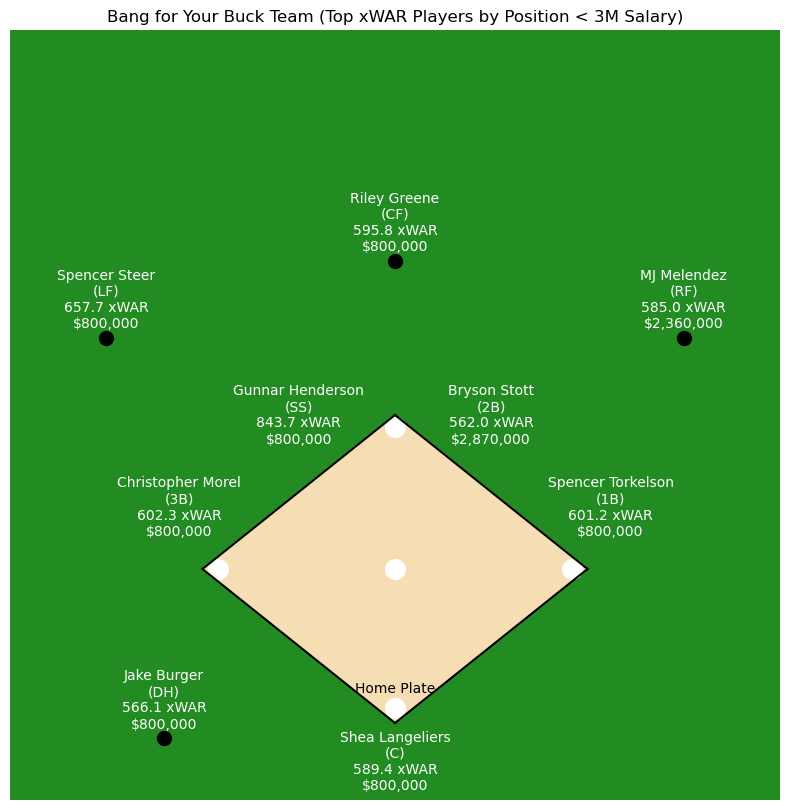

In [76]:
predicted_values_less3 = predicted_values[predicted_values['players_yearly_salary'] < 3000000].copy()

def clean_position(pos):
    if isinstance(pos, str):
        return pos.split('/')[0]
    return pos 

predicted_values_less3['primary_position'] = predicted_values_less3['primary_position'].apply(clean_position)
predicted_values_less3 = predicted_values_less3[(predicted_values_less3['primary_position'] != 'Unknown')]
predicted_values_less3['primary_position'] = predicted_values_less3['primary_position'].replace({'LF': 'OF', 'CF': 'OF', 'RF': 'OF'})

best_players = predicted_values_less3.loc[predicted_values_less3.groupby('primary_position')['xWAR'].idxmax()]

outfield_players = predicted_values_less3[predicted_values_less3['primary_position'] == 'OF']
outfield_players = outfield_players.sort_values(by='xWAR', ascending=False).head(3)

outfield_players_list = outfield_players['player_name'].tolist()
outfield_positions = ['OF_LF', 'OF_CF', 'OF_RF']

for i, pos in enumerate(outfield_positions):
    if i < len(outfield_players_list):  
        best_players.loc[best_players['primary_position'] == 'OF', 'player_name'] = outfield_players_list[i]

fig, ax = plt.subplots(figsize=(10, 10))
home_plate = (0.5, 0.1)
first_base = (0.25, 0.30)
second_base = (0.5, 0.50)
third_base = (0.75, 0.30)

infield = patches.Polygon(
    [home_plate, first_base, second_base, third_base, home_plate],
    closed=True,
    color='#f5deb3', 
    zorder=1
)
ax.add_patch(infield)

outfield = patches.Rectangle(
    (0, 0), 1, 1,  
    color='forestgreen',  
    zorder=0
)
ax.add_patch(outfield)

diamond_points = {
    'C': (0.5, 0.05),  
    '3B': (0.22, 0.38), 
    '2B': (0.625, 0.5),  
    '1B': (0.78, 0.38), 
    'SS': (0.375, 0.5),  
    'OF_LF': (0.125, 0.65),  
    'OF_CF': (0.5, 0.75),  
    'OF_RF': (0.875, 0.65),  
    'DH': (0.2, 0.13)    
}

ax.plot([0.25, 0.5], [0.3, 0.5], color="black")  # 1B to 2B line
ax.plot([0.75, 0.5], [0.3, 0.5], color="black")  # 3B to 2B line
ax.plot([0.5, 0.25], [0.1, 0.3], color="black")  # Catcher to 1st base
ax.plot([0.5, 0.75], [0.1, 0.3], color="black")  # Catcher to 3rd base

ax.scatter([0.5, 0.27, 0.73, 0.5, 0.5], 
           [0.12, 0.3, 0.3, 0.485, 0.3], color="white", s=200)  
ax.scatter([0.5, 0.125, 0.875, 0.2], 
           [0.7, 0.6, 0.6, 0.08], color="black", s=100) 
ax.annotate("Home Plate", (0.5, 0.14), ha='center')

for _, row in best_players.iterrows():
    position = row['primary_position']
    player = row['player_name']
    xwar = row['xWAR']
    salary = row['players_yearly_salary']

    if position == 'OF':
        for i, pos in enumerate(outfield_positions):
            if i < len(outfield_players):
                x, y = diamond_points[pos]
                outfield_player = outfield_players.iloc[i]
                outfield_name = outfield_player['player_name']
                outfield_xwar = outfield_player['xWAR']
                outfield_salary = outfield_player['players_yearly_salary']

                ax.text(
                    x, y,
                    f"{outfield_name}\n({pos[3:]})\n{outfield_xwar:.1f} xWAR\n${outfield_salary:,.0f}",
                    ha='center', va='center', fontsize=10, color='white'
                )
    else:
        x, y = diamond_points[position]
        ax.text(
            x, y,
            f"{player}\n({position})\n{xwar:.1f} xWAR\n${salary:,.0f}",
            ha='center', va='center', fontsize=10, color='white'
        )

ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title("Bang for Your Buck Team (Top xWAR Players by Position < 3M Salary)")
plt.show()

In [77]:
yanks = predicted_values[predicted_values['players_team'] == 'NYM']
yanks

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar
4,Juan Soto,2025,684,0.283573,0.537369,0.407575,0.945525,0.253014,0.129573,NYM,OF,51875000.0,928.933100,0.000018
10,Pete Alonso,2025,668,0.246963,0.526605,0.367555,0.894553,0.279982,0.146073,NYM,1B,20500000.0,859.847194,0.000042
14,Francisco Lindor,2025,651,0.254333,0.455923,0.345052,0.802034,0.200981,0.103086,NYM,SS,34100000.0,754.114636,0.000022
26,Brandon Nimmo,2025,601,0.264614,0.457008,0.354034,0.812086,0.191933,0.093910,NYM,OF,20500000.0,702.908972,0.000034
114,Jesse Winker,2025,434,0.205073,0.297068,0.288061,0.584066,0.093021,0.044020,NYM,OF,2000000.0,362.052201,0.000181
120,J.D. Martinez,2025,551,0.270588,0.552066,0.368486,0.920908,0.281064,0.169920,NYM,DH,12000000.0,749.944533,0.000062
135,Jeff McNeil,2025,533,0.252019,0.340943,0.295095,0.634944,0.090090,0.013984,NYM,2B,15750000.0,480.787767,0.000031
147,Mark Vientos,2025,343,0.245016,0.462065,0.330148,0.793048,0.216022,0.140088,NYM,3B,800000.0,403.819657,0.000505
154,Jose Siri,2025,379,0.211057,0.441130,0.297008,0.739031,0.229020,0.131020,NYM,OF,2500000.0,409.401386,0.000164
161,Harrison Bader,2025,373,0.236019,0.378528,0.290418,0.669440,0.141616,0.052550,NYM,OF,10500000.0,357.153095,0.000034


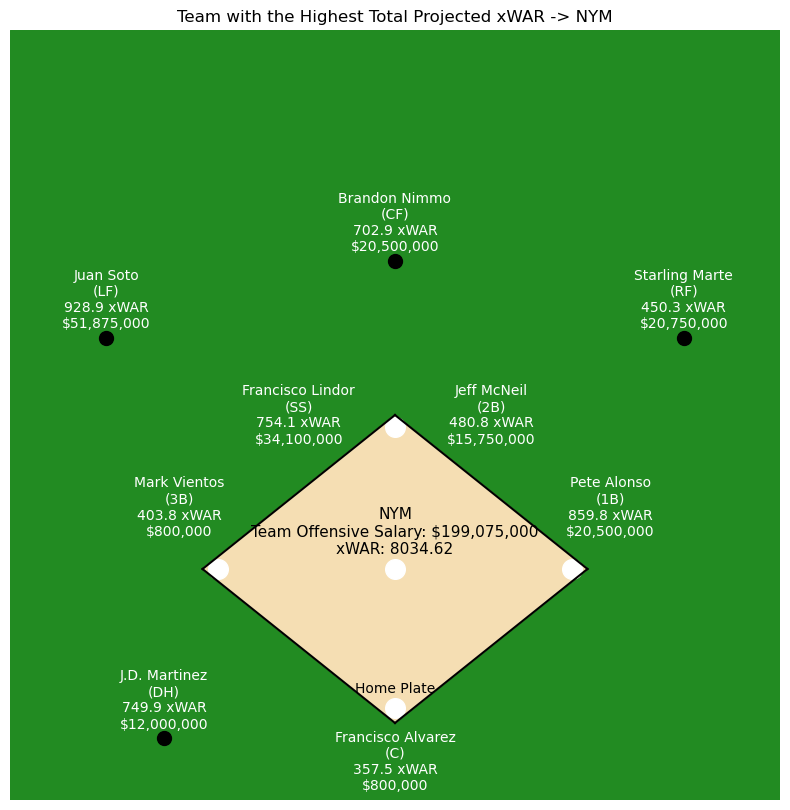

In [78]:
# Filter out 'Unknown' teams
filtered_data = predicted_values[predicted_values['players_team'] != 'Unknown']

# Group by 'players_team' and calculate combined xWAR and players_yearly_salary
team_totals = filtered_data.groupby('players_team').agg({
    'xWAR': 'sum',
    'players_yearly_salary': 'sum'
}).reset_index()

# Rename columns for clarity
team_totals.rename(columns={
    'xWAR': 'combined_xWAR',
    'players_yearly_salary': 'combined_yearly_salary'
}, inplace=True)


top_team_xwar_row = team_totals.loc[team_totals['combined_xWAR'].idxmax()]

# Extract the team name and xWAR
top_team = top_team_xwar_row['players_team']
top_xWAR = top_team_xwar_row['combined_xWAR']
top_salary = top_team_xwar_row['combined_yearly_salary']
formatted_xWAR = f"{top_xWAR:.2f}"
formatted_salary = f"{top_salary:,.0f}"

# Filter the DataFrame for players from the top team
predicted_values_tt = predicted_values[predicted_values['players_team'] == top_team].copy()

# Clean up the 'primary_position' column
def clean_position(pos):
    if isinstance(pos, str):
        return pos.split('/')[0]
    return pos  # In case the position is NaN or a number, return as is

predicted_values_tt['primary_position'] = predicted_values_tt['primary_position'].apply(clean_position)
predicted_values_tt = predicted_values_tt[(predicted_values_tt['primary_position'] != 'Unknown')]

# Consolidate outfield positions into 'OF'
predicted_values_tt['primary_position'] = predicted_values_tt['primary_position'].replace({'LF': 'OF', 'CF': 'OF', 'RF': 'OF'})

best_players = predicted_values_tt.loc[predicted_values_tt.groupby('primary_position')['xWAR'].idxmax()]

outfield_players = predicted_values_tt[predicted_values_tt['primary_position'] == 'OF']
outfield_players = outfield_players.sort_values(by='xWAR', ascending=False).head(3)

outfield_players_list = outfield_players['player_name'].tolist()
outfield_positions = ['OF_LF', 'OF_CF', 'OF_RF']

for i, pos in enumerate(outfield_positions):
    if i < len(outfield_players_list):  
        best_players.loc[best_players['primary_position'] == 'OF', 'player_name'] = outfield_players_list[i]

fig, ax = plt.subplots(figsize=(10, 10))
home_plate = (0.5, 0.1)
first_base = (0.25, 0.30)
second_base = (0.5, 0.50)
third_base = (0.75, 0.30)

infield = patches.Polygon(
    [home_plate, first_base, second_base, third_base, home_plate],
    closed=True,
    color='#f5deb3', 
    zorder=1
)
ax.add_patch(infield)

outfield = patches.Rectangle(
    (0, 0), 1, 1,  
    color='forestgreen',  
    zorder=0
)
ax.add_patch(outfield)

diamond_points = {
    'C': (0.5, 0.05),  
    '3B': (0.22, 0.38), 
    '2B': (0.625, 0.5),  
    '1B': (0.78, 0.38), 
    'SS': (0.375, 0.5),  
    'OF_LF': (0.125, 0.65),  
    'OF_CF': (0.5, 0.75),  
    'OF_RF': (0.875, 0.65),  
    'DH': (0.2, 0.13)    
}

ax.plot([0.25, 0.5], [0.3, 0.5], color="black")  # 1B to 2B line
ax.plot([0.75, 0.5], [0.3, 0.5], color="black")  # 3B to 2B line
ax.plot([0.5, 0.25], [0.1, 0.3], color="black")  # Catcher to 1st base
ax.plot([0.5, 0.75], [0.1, 0.3], color="black")  # Catcher to 3rd base

ax.scatter([0.5, 0.27, 0.73, 0.5, 0.5], 
           [0.12, 0.3, 0.3, 0.485, 0.3], color="white", s=200)  
ax.scatter([0.5, 0.125, 0.875, 0.2], 
           [0.7, 0.6, 0.6, 0.08], color="black", s=100) 
ax.annotate("Home Plate", (0.5, 0.14), ha='center')
ax.annotate(f"{top_team}\nTeam Offensive Salary: ${formatted_salary}\nxWAR: {formatted_xWAR}", 
            (0.5, 0.32), 
            ha='center', 
            fontsize=11)

for _, row in best_players.iterrows():
    position = row['primary_position']
    player = row['player_name']
    xwar = row['xWAR']
    salary = row['players_yearly_salary']

    if position == 'OF':
        for i, pos in enumerate(outfield_positions):
            if i < len(outfield_players):
                x, y = diamond_points[pos]
                outfield_player = outfield_players.iloc[i]
                outfield_name = outfield_player['player_name']
                outfield_xwar = outfield_player['xWAR']
                outfield_salary = outfield_player['players_yearly_salary']

                ax.text(
                    x, y,
                    f"{outfield_name}\n({pos[3:]})\n{outfield_xwar:.1f} xWAR\n${outfield_salary:,.0f}",
                    ha='center', va='center', fontsize=10, color='white'
                )
    else:
        x, y = diamond_points[position]
        ax.text(
            x, y,
            f"{player}\n({position})\n{xwar:.1f} xWAR\n${salary:,.0f}",
            ha='center', va='center', fontsize=10, color='white'
        )

ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title(f"Team with the Highest Total Projected xWAR -> {top_team}")
plt.show()

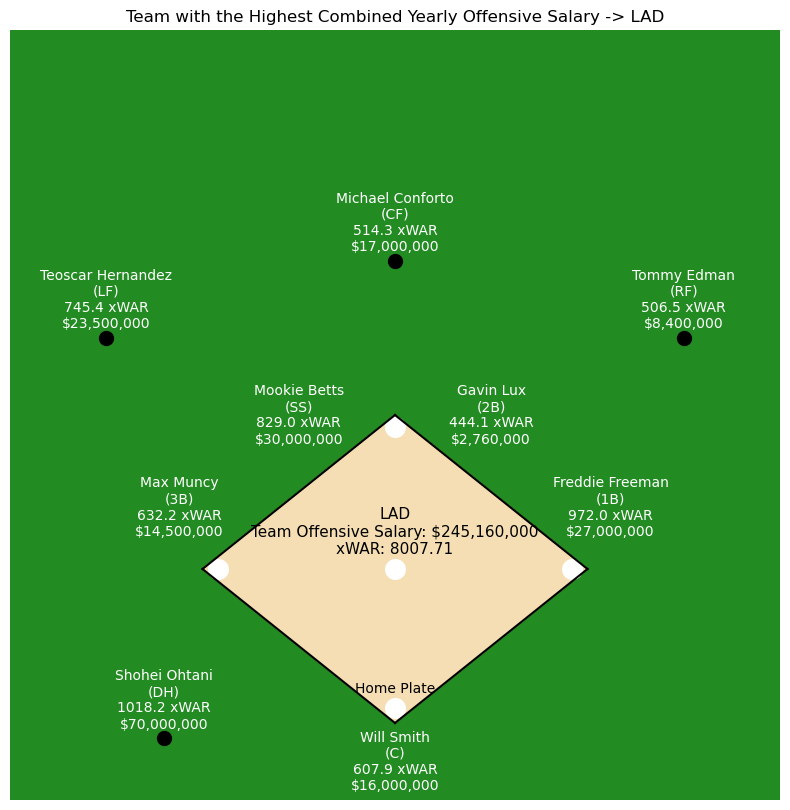

In [79]:
# Find the team with the highest combined yearly salary
top_team_salary_row = team_totals.loc[team_totals['combined_yearly_salary'].idxmax()]

# Extract the team name and salary
top_team = top_team_salary_row['players_team']
top_xWAR = top_team_salary_row['combined_xWAR']
formatted_xWAR = f"{top_xWAR:.2f}"
top_salary = top_team_salary_row['combined_yearly_salary']
formatted_salary = f"${top_salary:,.0f}"

# Filter the DataFrame for players from the top team
predicted_values_tts = predicted_values[predicted_values['players_team'] == top_team].copy()

# Clean up the 'primary_position' column
def clean_position(pos):
    if isinstance(pos, str):
        return pos.split('/')[0]
    return pos  # In case the position is NaN or a number, return as is

predicted_values_tts['primary_position'] = predicted_values_tts['primary_position'].apply(clean_position)
predicted_values_tts.loc[predicted_values_tts['player_name'] == 'Max Muncy', 'primary_position'] = '3B'
#predicted_values_tts = predicted_values_tt[(predicted_values_tts['primary_position'] != 'Unknown')]

# Consolidate outfield positions into 'OF'
predicted_values_tts['primary_position'] = predicted_values_tts['primary_position'].replace({'LF': 'OF', 'CF': 'OF', 'RF': 'OF'})

# Select the best players by xWAR for each position
best_players = predicted_values_tts.loc[predicted_values_tts.groupby('primary_position')['xWAR'].idxmax()]

# Handle the outfield separately (top 3 players by xWAR)
outfield_players = predicted_values_tts[predicted_values_tts['primary_position'] == 'OF']
outfield_players = outfield_players.sort_values(by='xWAR', ascending=False).head(3)

# Update the best players DataFrame for the top 3 outfielders
outfield_positions = ['OF_LF', 'OF_CF', 'OF_RF']
for i, pos in enumerate(outfield_positions):
    if i < len(outfield_players):
        best_players.loc[best_players['primary_position'] == 'OF', 'player_name'] = outfield_players.iloc[i]['player_name']

# Visualization: Create the baseball field plot
fig, ax = plt.subplots(figsize=(10, 10))
home_plate = (0.5, 0.1)
first_base = (0.25, 0.30)
second_base = (0.5, 0.50)
third_base = (0.75, 0.30)

infield = patches.Polygon(
    [home_plate, first_base, second_base, third_base, home_plate],
    closed=True,
    color='#f5deb3', 
    zorder=1
)
ax.add_patch(infield)

outfield = patches.Rectangle(
    (0, 0), 1, 1,  
    color='forestgreen',  
    zorder=0
)
ax.add_patch(outfield)

diamond_points = {
    'C': (0.5, 0.05),  
    '3B': (0.22, 0.38), 
    '2B': (0.625, 0.5),  
    '1B': (0.78, 0.38), 
    'SS': (0.375, 0.5),  
    'OF_LF': (0.125, 0.65),  
    'OF_CF': (0.5, 0.75),  
    'OF_RF': (0.875, 0.65),  
    'DH': (0.2, 0.13)    
}

# Draw the diamond and labels
ax.plot([0.25, 0.5], [0.3, 0.5], color="black")  # 1B to 2B line
ax.plot([0.75, 0.5], [0.3, 0.5], color="black")  # 3B to 2B line
ax.plot([0.5, 0.25], [0.1, 0.3], color="black")  # Catcher to 1st base
ax.plot([0.5, 0.75], [0.1, 0.3], color="black")  # Catcher to 3rd base

ax.scatter([0.5, 0.27, 0.73, 0.5, 0.5], 
           [0.12, 0.3, 0.3, 0.485, 0.3], color="white", s=200)  
ax.scatter([0.5, 0.125, 0.875, 0.2], 
           [0.7, 0.6, 0.6, 0.08], color="black", s=100) 
ax.annotate("Home Plate", (0.5, 0.14), ha='center')
ax.annotate(f"{top_team}\nTeam Offensive Salary: {formatted_salary}\nxWAR: {formatted_xWAR}", 
            (0.5, 0.32), 
            ha='center', 
            fontsize=11)

for _, row in best_players.iterrows():
    position = row['primary_position']
    player = row['player_name']
    xwar = row['xWAR']
    salary = row['players_yearly_salary']

    if position == 'OF':
        for i, pos in enumerate(outfield_positions):
            if i < len(outfield_players):
                x, y = diamond_points[pos]
                outfield_player = outfield_players.iloc[i]
                outfield_name = outfield_player['player_name']
                outfield_xwar = outfield_player['xWAR']
                outfield_salary = outfield_player['players_yearly_salary']

                ax.text(
                    x, y,
                    f"{outfield_name}\n({pos[3:]})\n{outfield_xwar:.1f} xWAR\n${outfield_salary:,.0f}",
                    ha='center', va='center', fontsize=10, color='white'
                )
    else:
        x, y = diamond_points[position]
        ax.text(
            x, y,
            f"{player}\n({position})\n{xwar:.1f} xWAR\n${salary:,.0f}",
            ha='center', va='center', fontsize=10, color='white'
        )

ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title(f"Team with the Highest Combined Yearly Offensive Salary -> {top_team}")
plt.show()

In [80]:
team_totals = pd.DataFrame(team_totals)
team_totals['combined_yearly_salary'] = pd.to_numeric(team_totals['combined_yearly_salary'], errors='coerce')

df_ = team_totals.sort_values(['combined_yearly_salary']).reset_index()
lowest_salaries = df_.head(10)

lowest_salaries[['players_team','combined_xWAR', 'combined_yearly_salary']]

,players_team,combined_xWAR,combined_yearly_salary
0,OAK,221.871576,740000.0
1,MIA,1098.101105,4995800.0
2,ATH,2177.194969,10550000.0
3,WSH,2358.692833,16175000.0
4,CIN,4903.922266,39770000.0
5,PIT,5097.516032,41525000.0
6,TB,3936.138702,42756245.0
7,CHW,3519.308659,46856950.0
8,CLE,3933.668763,48050000.0
9,DET,4411.165852,50780000.0


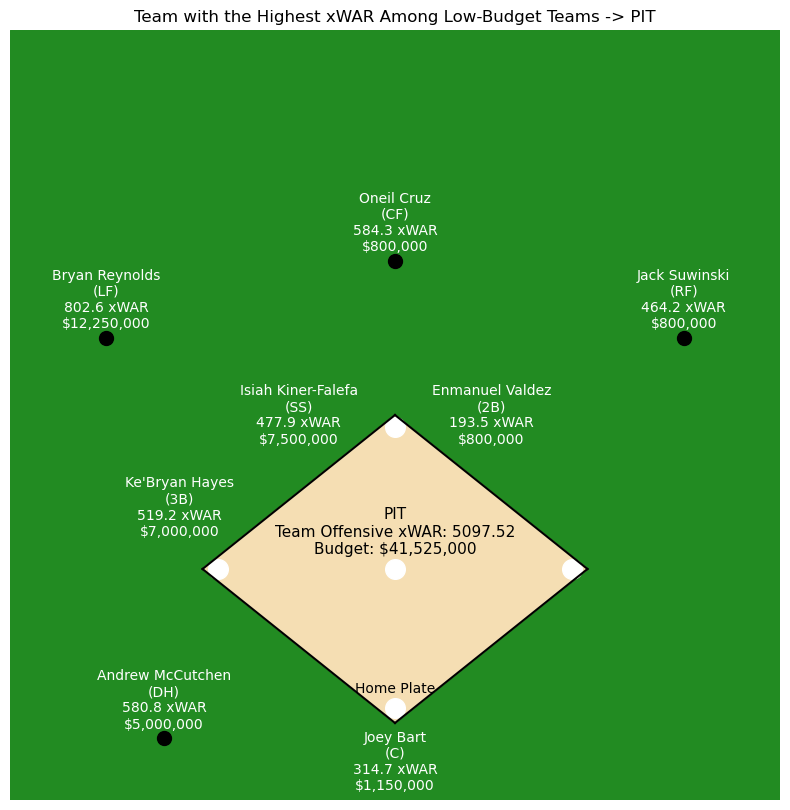

In [81]:
# Find the team with the highest combined xWAR from the lowest_salaries DataFrame
top_team_xWAR_row = lowest_salaries.loc[lowest_salaries['combined_xWAR'].idxmax()]

# Extract the team name and xWAR
top_team = top_team_xWAR_row['players_team']
top_xWAR = top_team_xWAR_row['combined_xWAR']
formatted_xWAR = f"{top_xWAR:.2f}"
top_salary = top_team_xWAR_row['combined_yearly_salary']
formatted_salary = f"${top_salary:,.0f}"

# Filter the DataFrame for players from the top team
predicted_values_lbt = predicted_values[predicted_values['players_team'] == top_team].copy()

# Clean up the 'primary_position' column
def clean_position(pos):
    if isinstance(pos, str):
        return pos.split('/')[0]
    return pos  # In case the position is NaN or a number, return as is

predicted_values_lbt['primary_position'] = predicted_values_lbt['primary_position'].apply(clean_position)
predicted_values_lbt.loc[predicted_values_lbt['player_name'] == 'Max Muncy', 'primary_position'] = '3B'

# Consolidate outfield positions into 'OF'
predicted_values_lbt['primary_position'] = predicted_values_lbt['primary_position'].replace({'LF': 'OF', 'CF': 'OF', 'RF': 'OF'})

# Select the best players by xWAR for each position
best_players = predicted_values_lbt.loc[predicted_values_lbt.groupby('primary_position')['xWAR'].idxmax()]

# Handle the outfield separately (top 3 players by xWAR)
outfield_players = predicted_values_lbt[predicted_values_lbt['primary_position'] == 'OF']
outfield_players = outfield_players.sort_values(by='xWAR', ascending=False).head(3)

# Update the best players DataFrame for the top 3 outfielders
outfield_positions = ['OF_LF', 'OF_CF', 'OF_RF']
for i, pos in enumerate(outfield_positions):
    if i < len(outfield_players):
        best_players.loc[best_players['primary_position'] == 'OF', 'player_name'] = outfield_players.iloc[i]['player_name']

# Visualization: Create the baseball field plot
fig, ax = plt.subplots(figsize=(10, 10))
home_plate = (0.5, 0.1)
first_base = (0.25, 0.30)
second_base = (0.5, 0.50)
third_base = (0.75, 0.30)

infield = patches.Polygon(
    [home_plate, first_base, second_base, third_base, home_plate],
    closed=True,
    color='#f5deb3', 
    zorder=1
)
ax.add_patch(infield)

outfield = patches.Rectangle(
    (0, 0), 1, 1,  
    color='forestgreen',  
    zorder=0
)
ax.add_patch(outfield)

diamond_points = {
    'C': (0.5, 0.05),  
    '3B': (0.22, 0.38), 
    '2B': (0.625, 0.5),  
    '1B': (0.78, 0.38), 
    'SS': (0.375, 0.5),  
    'OF_LF': (0.125, 0.65),  
    'OF_CF': (0.5, 0.75),  
    'OF_RF': (0.875, 0.65),  
    'DH': (0.2, 0.13)    
}

# Draw the diamond and labels
ax.plot([0.25, 0.5], [0.3, 0.5], color="black")  # 1B to 2B line
ax.plot([0.75, 0.5], [0.3, 0.5], color="black")  # 3B to 2B line
ax.plot([0.5, 0.25], [0.1, 0.3], color="black")  # Catcher to 1st base
ax.plot([0.5, 0.75], [0.1, 0.3], color="black")  # Catcher to 3rd base

ax.scatter([0.5, 0.27, 0.73, 0.5, 0.5], 
           [0.12, 0.3, 0.3, 0.485, 0.3], color="white", s=200)  
ax.scatter([0.5, 0.125, 0.875, 0.2], 
           [0.7, 0.6, 0.6, 0.08], color="black", s=100) 
ax.annotate("Home Plate", (0.5, 0.14), ha='center')
ax.annotate(f"{top_team}\nTeam Offensive xWAR: {formatted_xWAR}\nBudget: {formatted_salary}", 
            (0.5, 0.32), 
            ha='center', 
            fontsize=11)

for _, row in best_players.iterrows():
    position = row['primary_position']
    player = row['player_name']
    xwar = row['xWAR']
    salary = row['players_yearly_salary']

    if position == 'OF':
        for i, pos in enumerate(outfield_positions):
            if i < len(outfield_players):
                x, y = diamond_points[pos]
                outfield_player = outfield_players.iloc[i]
                outfield_name = outfield_player['player_name']
                outfield_xwar = outfield_player['xWAR']
                outfield_salary = outfield_player['players_yearly_salary']

                ax.text(
                    x, y,
                    f"{outfield_name}\n({pos[3:]})\n{outfield_xwar:.1f} xWAR\n${outfield_salary:,.0f}",
                    ha='center', va='center', fontsize=10, color='white'
                )
    else:
        x, y = diamond_points[position]
        ax.text(
            x, y,
            f"{player}\n({position})\n{xwar:.1f} xWAR\n${salary:,.0f}",
            ha='center', va='center', fontsize=10, color='white'
        )

ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title(f"Team with the Highest xWAR Among Low-Budget Teams -> {top_team}")
plt.show()

In [82]:
predicted_values

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar
0,Jarren Duran,2025,440,0.267050,0.400070,0.318008,0.719140,0.133500,0.053891,BOS,OF,4110000.0,457.168250,0.000111
1,Shohei Ohtani,2025,658,0.293081,0.634002,0.424951,1.060062,0.340199,0.195452,LAD,DH,70000000.0,1018.246146,0.000015
2,Gunnar Henderson,2025,670,0.282039,0.491126,0.373116,0.865070,0.210000,0.113000,BAL,SS,800000.0,843.718935,0.001055
3,Marcus Semien,2025,729,0.261030,0.426453,0.332301,0.759508,0.164495,0.065917,TEX,2B,26000000.0,791.476021,0.000030
4,Juan Soto,2025,684,0.283573,0.537369,0.407575,0.945525,0.253014,0.129573,NYM,OF,51875000.0,928.933100,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Luis Torrens,2025,272,0.236886,0.333961,0.284912,0.617943,0.097870,0.049906,NYM,C,1700000.0,246.340891,0.000145
447,Hanser Alberto,2025,207,0.216950,0.304952,0.234988,0.538870,0.088978,0.015947,Unknown,Unknown,760000.0,159.977206,0.000210
448,Kurt Suzuki,2025,203,0.191925,0.281915,0.255886,0.536866,0.090967,0.035887,Unknown,Unknown,760000.0,155.419443,0.000204
449,Lorenzo Cain,2025,221,0.200890,0.253943,0.230880,0.483970,0.053893,0.000980,Unknown,Unknown,760000.0,151.759129,0.000200


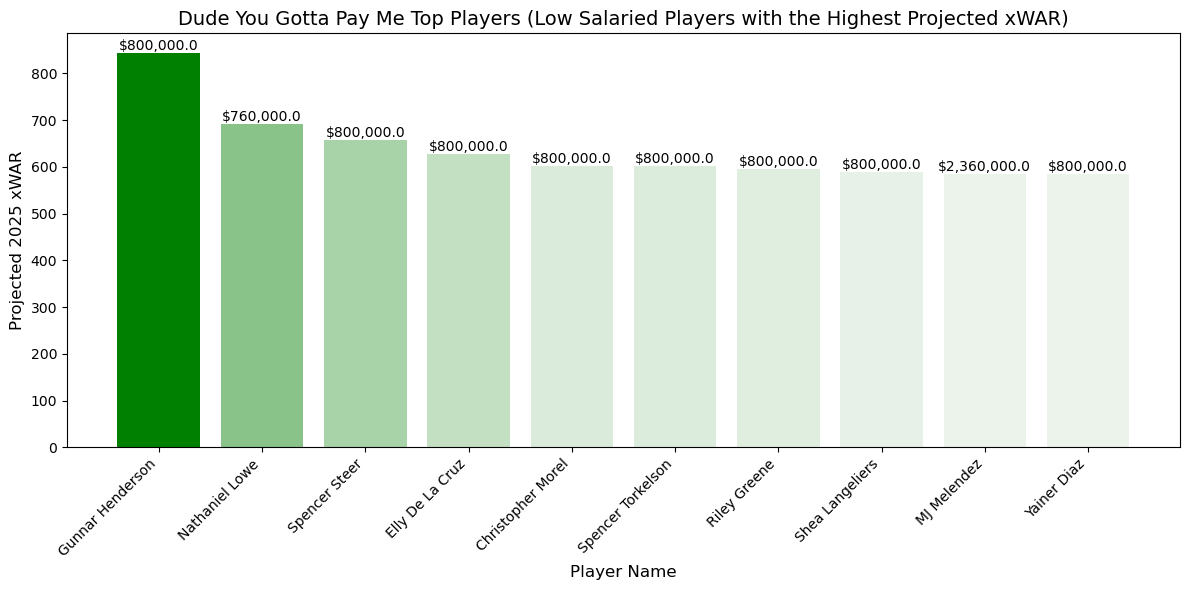

In [83]:
# Filter players with salary under 3,000,000
filtered_players = predicted_values[predicted_values['players_yearly_salary'] < 3000000]
filtered_players = filtered_players[filtered_players['player_name'] != 'Jose Abreu']

# Sort by xWAR (descending) and select top 10
top_players = filtered_players.sort_values(by='xWAR', ascending=False).head(10)

# Normalize xWAR for gradient color mapping
norm = (top_players['xWAR'] - top_players['xWAR'].min()) / (top_players['xWAR'].max() - top_players['xWAR'].min())
colors = sns.light_palette("green", as_cmap=True)(norm)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_players['player_name'], top_players['xWAR'], color=colors)

# Add salary labels on top of bars
for bar, salary in zip(bars, top_players['players_yearly_salary']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"${salary:,}", ha='center', va='bottom', fontsize=10)

# Add Title and Labels
plt.title("Dude You Gotta Pay Me Top Players (Low Salaried Players with the Highest Projected xWAR)", fontsize=14)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Projected 2025 xWAR", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [84]:
teams_to_league = {
    # American League (AL)
    'BAL': 'AL',  # Baltimore Orioles
    'BOS': 'AL',  # Boston Red Sox
    'NYY': 'AL',  # New York Yankees
    'TB': 'AL',   # Tampa Bay Rays
    'TOR': 'AL',  # Toronto Blue Jays
    'CWS': 'AL',  # Chicago White Sox
    'CLE': 'AL',  # Cleveland Guardians
    'DET': 'AL',  # Detroit Tigers
    'KC': 'AL',   # Kansas City Royals
    'MIN': 'AL',  # Minnesota Twins
    'HOU': 'AL',  # Houston Astros
    'LAA': 'AL',  # Los Angeles Angels
    'OAK': 'AL',  # Oakland Athletics
    'SEA': 'AL',  # Seattle Mariners
    'TEX': 'AL',  # Texas Rangers

    # National League (NL)
    'ATL': 'NL',  # Atlanta Braves
    'MIA': 'NL',  # Miami Marlins
    'NYM': 'NL',  # New York Mets
    'PHI': 'NL',  # Philadelphia Phillies
    'WSH': 'NL',  # Washington Nationals
    'CHC': 'NL',  # Chicago Cubs
    'CIN': 'NL',  # Cincinnati Reds
    'MIL': 'NL',  # Milwaukee Brewers
    'PIT': 'NL',  # Pittsburgh Pirates
    'STL': 'NL',  # St. Louis Cardinals
    'ARI': 'NL',  # Arizona Diamondbacks
    'COL': 'NL',  # Colorado Rockies
    'LAD': 'NL',  # Los Angeles Dodgers
    'SD': 'NL',   # San Diego Padres
    'SF': 'NL'    # San Francisco Giants
}
# Standardize column values
predicted_values['players_team'] = predicted_values['players_team'].str.strip().str.upper()
predicted_values['League'] = predicted_values['players_team'].map(teams_to_league)
predicted_values

,player_name,year,pa,predicted_est_ba,predicted_est_slg,predicted_est_woba,predicted_est_ops,predicted_est_iso,predicted_brl_percent,players_team,primary_position,players_yearly_salary,xWAR,xWAR_Per_Dollar,League
0,Jarren Duran,2025,440,0.267050,0.400070,0.318008,0.719140,0.133500,0.053891,BOS,OF,4110000.0,457.168250,0.000111,AL
1,Shohei Ohtani,2025,658,0.293081,0.634002,0.424951,1.060062,0.340199,0.195452,LAD,DH,70000000.0,1018.246146,0.000015,NL
2,Gunnar Henderson,2025,670,0.282039,0.491126,0.373116,0.865070,0.210000,0.113000,BAL,SS,800000.0,843.718935,0.001055,AL
3,Marcus Semien,2025,729,0.261030,0.426453,0.332301,0.759508,0.164495,0.065917,TEX,2B,26000000.0,791.476021,0.000030,AL
4,Juan Soto,2025,684,0.283573,0.537369,0.407575,0.945525,0.253014,0.129573,NYM,OF,51875000.0,928.933100,0.000018,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Luis Torrens,2025,272,0.236886,0.333961,0.284912,0.617943,0.097870,0.049906,NYM,C,1700000.0,246.340891,0.000145,NL
447,Hanser Alberto,2025,207,0.216950,0.304952,0.234988,0.538870,0.088978,0.015947,UNKNOWN,Unknown,760000.0,159.977206,0.000210,NaN
448,Kurt Suzuki,2025,203,0.191925,0.281915,0.255886,0.536866,0.090967,0.035887,UNKNOWN,Unknown,760000.0,155.419443,0.000204,NaN
449,Lorenzo Cain,2025,221,0.200890,0.253943,0.230880,0.483970,0.053893,0.000980,UNKNOWN,Unknown,760000.0,151.759129,0.000200,NaN


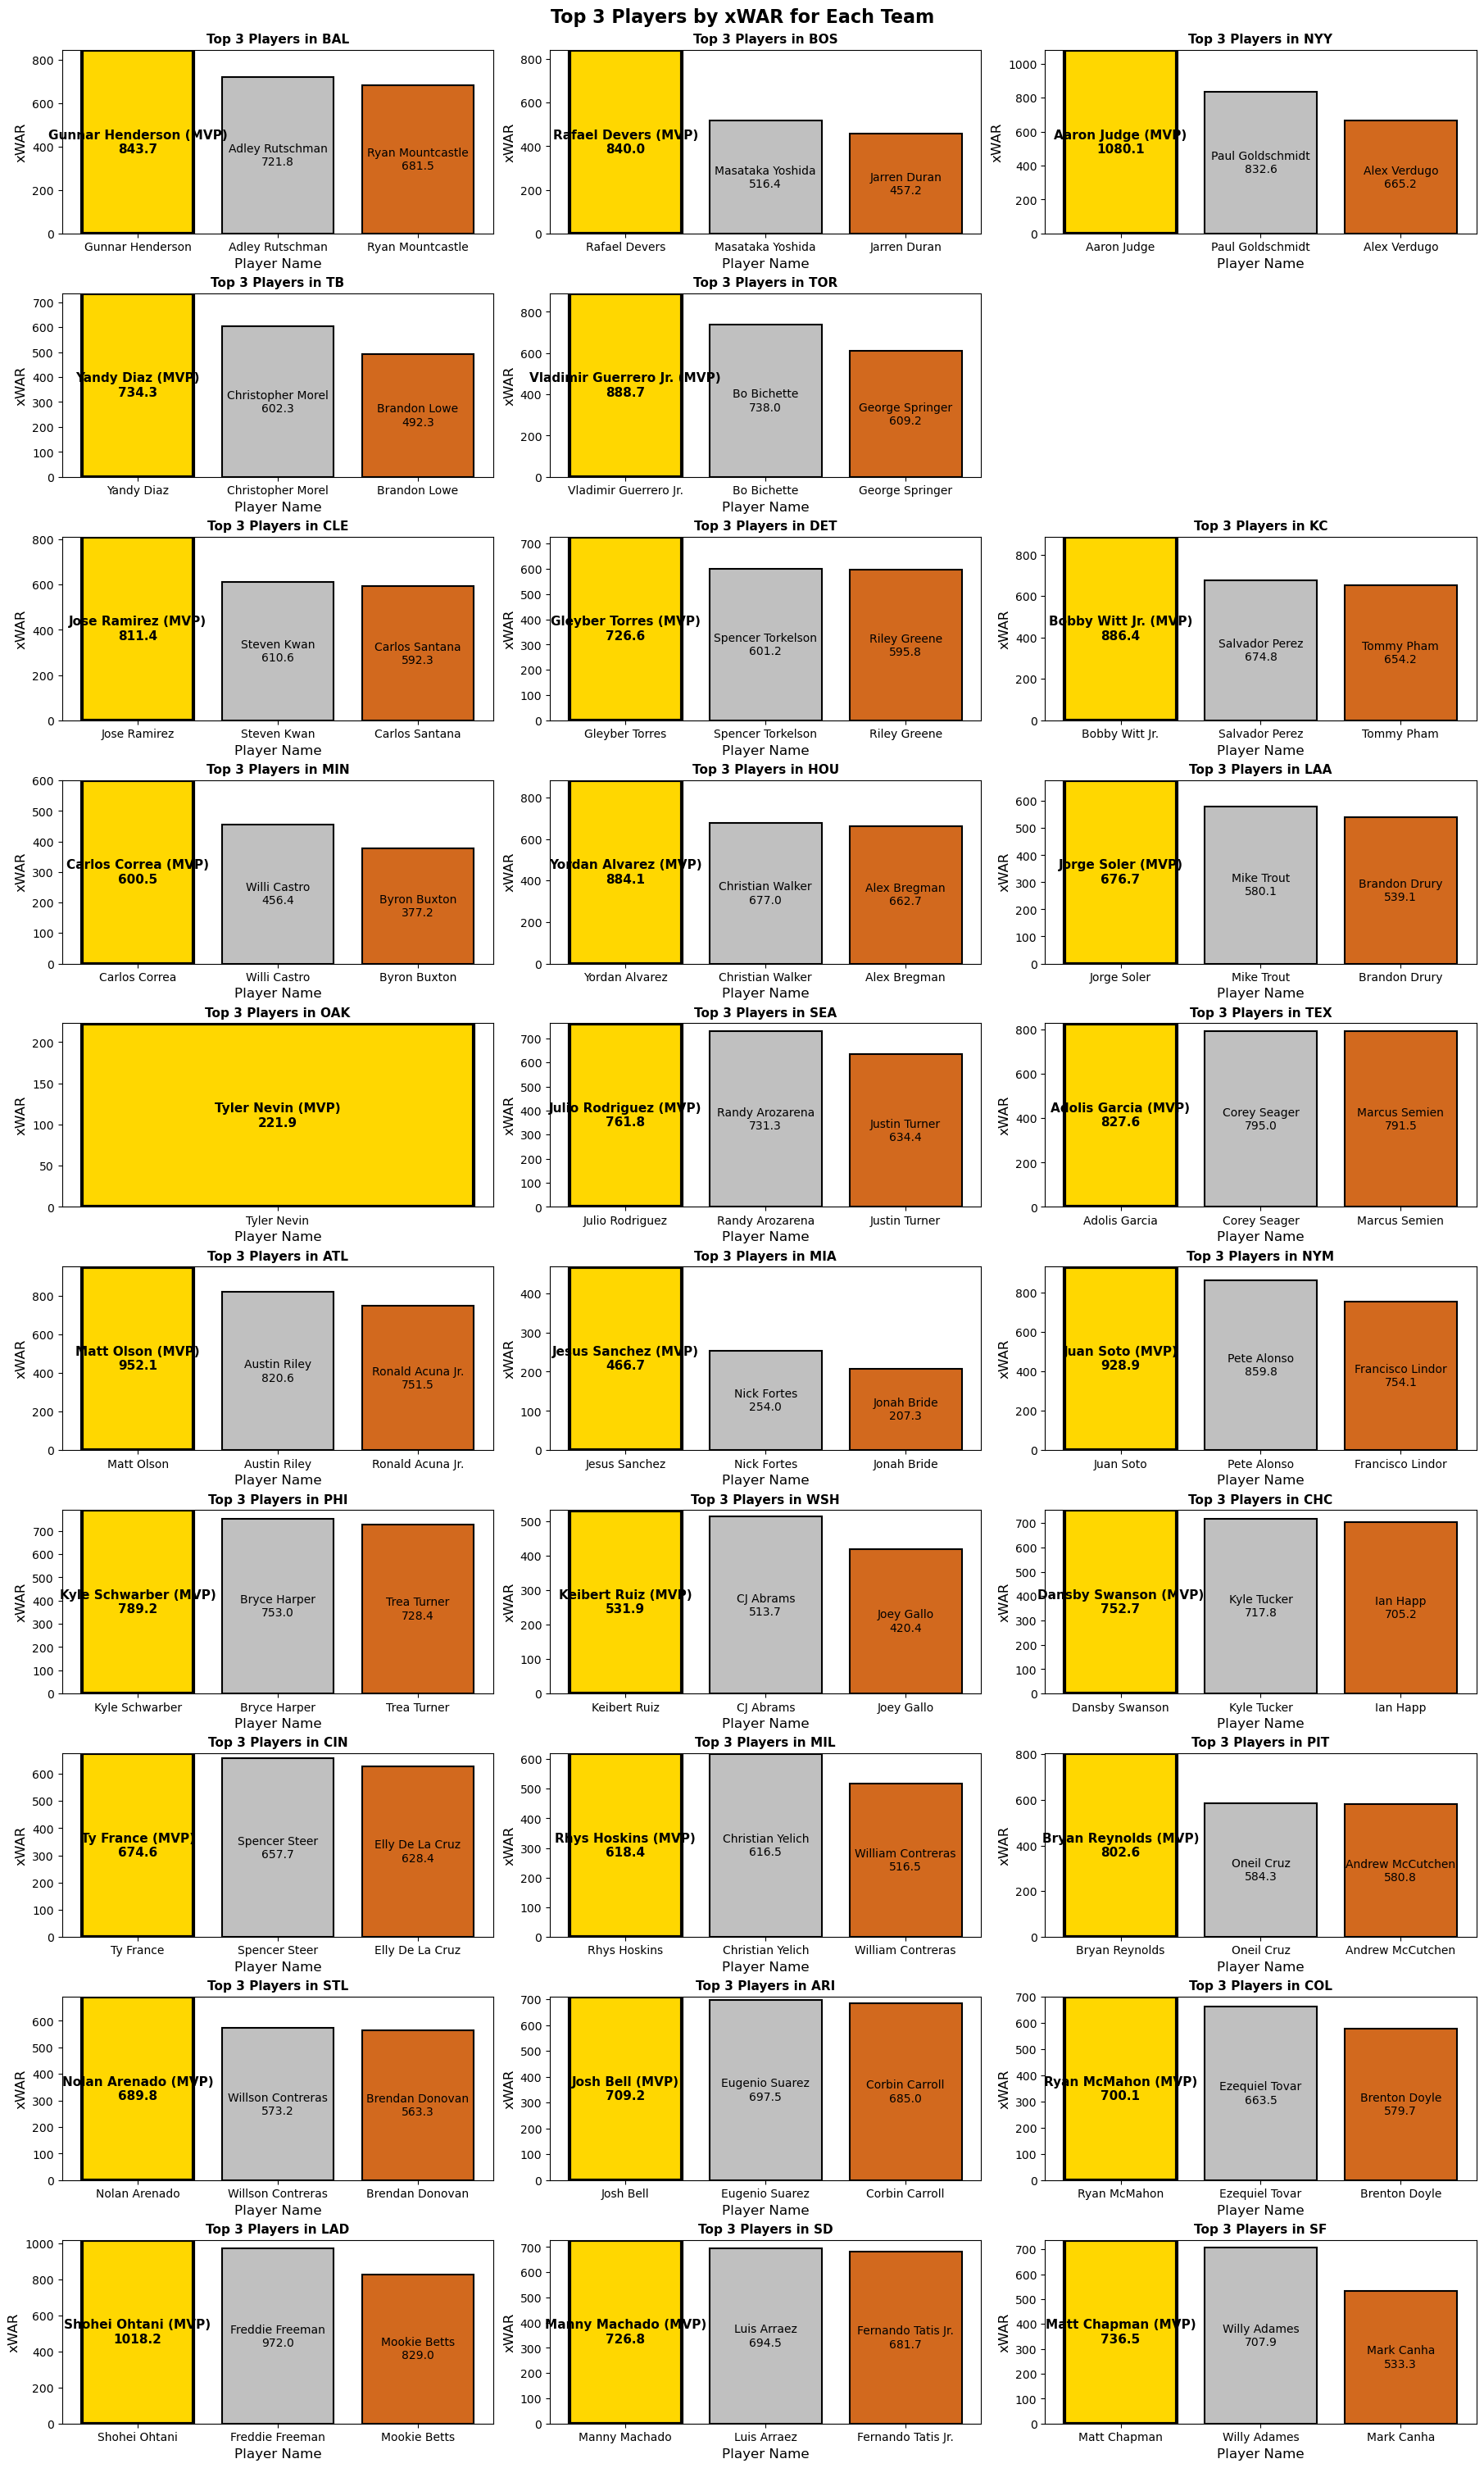

In [85]:
import math
# Get the list of teams
teams = list(teams_to_league.keys())

# Get the number of teams in the dataset
num_teams = len(teams)

# Calculate the required number of rows and columns for the subplots
rows = math.ceil(num_teams / 3)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 3), constrained_layout=True)

# Flatten axes to ensure we can index them properly
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Function to create a podium chart for each team
def create_team_podium_chart(df, team, ax):
    # Filter by team and sort by xWAR
    team_data = df[df['players_team'] == team].sort_values(by='xWAR', ascending=False).head(3)
    team_data = team_data.reset_index(drop=True)
    
    # Check if there are fewer than 3 players
    if len(team_data) < 1:
        ax.axis('off')  # Hide the axis if no players for the team
        return
    
    # Assign bar colors
    colors = ['gold', 'silver', 'chocolate']
    
    # Create the bar chart
    bars = ax.bar(team_data['player_name'], team_data['xWAR'], color=colors[:len(team_data)], edgecolor='black', linewidth=1.5)
    
    # Highlight the MVP bar with a thicker edge and darker color
    mvp_bar = bars[0]
    mvp_bar.set_edgecolor('black')
    mvp_bar.set_linewidth(3)
    
    # Highlight the MVP (highest xWAR) in bold
    mvp = team_data.iloc[0]
    ax.text(mvp_bar.get_x() + mvp_bar.get_width() / 2, mvp_bar.get_height() / 2,
            f"{mvp['player_name']} (MVP)\n{mvp['xWAR']:.1f}", 
            ha='center', va='center', fontsize=11, color='black', weight='bold')
    
    # Add labels for other bars inside the bars
    for bar, xwar, player_name in zip(bars[1:], team_data['xWAR'][1:], team_data['player_name'][1:]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                f"{player_name}\n{xwar:.1f}", ha='center', va='center', fontsize=10, color='black')
    
    # Title and axis adjustments
    ax.set_title(f"Top 3 Players in {team}", fontsize=11, weight='bold')
    ax.set_ylabel('xWAR', fontsize=12)
    ax.set_xlabel('Player Name', fontsize=12)
    ax.set_xticks(range(len(team_data['player_name'])))
    ax.set_xticklabels(team_data['player_name'], fontsize=10)
    ax.set_ylim(0, team_data['xWAR'].max() + 1)

# Create podium charts for each team
for i, team in enumerate(teams):
    if i < len(axes):  # Ensure we don't exceed available subplots
        create_team_podium_chart(predicted_values, team, axes[i])

# Hide unused axes if there are fewer teams than subplots
for j in range(num_teams, len(axes)):
    axes[j].axis('off')

# Overall title
plt.suptitle("Top 3 Players by xWAR for Each Team", fontsize=16, weight='bold')
plt.show()

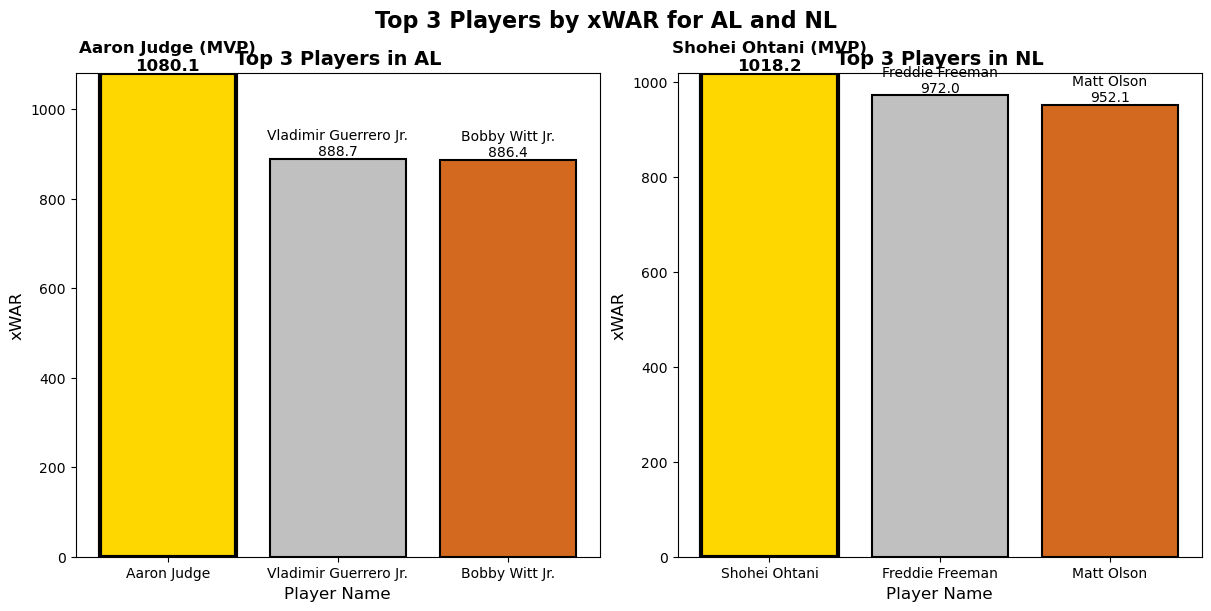

In [86]:
# Function to create a podium chart for a specific league
def create_podium_chart(df, league, ax):
    # Filter by league and sort by xWAR
    league_data = df[df['League'] == league].sort_values(by='xWAR', ascending=False).head(3)
    league_data = league_data.reset_index(drop=True)
    
    # Assign bar colors
    colors = ['gold', 'silver', 'chocolate']
    
    # Create the bar chart
    bars = ax.bar(league_data['player_name'], league_data['xWAR'], color=colors, edgecolor='black', linewidth=1.5)
    
    # Highlight the MVP bar with a thicker edge and darker color
    mvp_bar = bars[0]
    mvp_bar.set_edgecolor('black')
    mvp_bar.set_linewidth(3)
    
    # Highlight the MVP (highest xWAR) in bold
    mvp = league_data.iloc[0]
    ax.text(mvp_bar.get_x() + mvp_bar.get_width() / 2, mvp_bar.get_height() + 0.2,
            f"{mvp['player_name']} (MVP)\n{mvp['xWAR']:.1f}", 
            ha='center', va='bottom', fontsize=12, color='black', weight='bold')
    
    # Add labels for other bars
    for bar, xwar, player_name in zip(bars[1:], league_data['xWAR'][1:], league_data['player_name'][1:]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
                f"{player_name}\n{xwar:.1f}", ha='center', va='bottom', fontsize=10)
    
    # Title and axis adjustments
    ax.set_title(f"Top 3 Players in {league}", fontsize=14, weight='bold')
    ax.set_ylabel('xWAR', fontsize=12)
    ax.set_xlabel('Player Name', fontsize=12)
    ax.set_xticks(range(len(league_data['player_name'])))
    ax.set_xticklabels(league_data['player_name'], fontsize=10)
    ax.set_ylim(0, league_data['xWAR'].max() + 1)

# Create subplots for AL and NL
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Create podium charts for AL and NL
create_podium_chart(predicted_values, 'AL', axes[0])
create_podium_chart(predicted_values, 'NL', axes[1])

# Adjust overall layout
plt.suptitle("Top 3 Players by xWAR for AL and NL", fontsize=16, weight='bold')
plt.show()